# Исследование закономерностей успешности компьютерной игры.

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

**Цель исследования:**
* Нужно выявить определяющие успешность игры закономерности.

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

Данные для исследования, будем брать из открытых источников, где описаны исторические данные о продажах игр, оценках пользователей и экспертов, жанры и платформы, на которых выпускались игры (Xbox, PlayStation).

## Шаг 1. Откроем файл с данными и изучим общую информацию.

### Импортируем библиотеки и сохраняем данные в переменной data.

In [2]:
from scipy import stats as st # испорт библиотеки stats для проверки гипотез

import pandas as pd # импортируем библиотеку pandas

import matplotlib.pyplot as plt # импортируем библиотеку matplotlib

import numpy as np # импортируем библиотеку numpy

In [3]:
# используя конструкцию try-except читаем нужный нам файл 
# сохраняем его в переменной data
try: 
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('http://localhost:8888/edit/games.csv')

### Изучаем общую информацию о полученном датафрейме.

In [4]:
data.head(10) # выводим на экран первые 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#выводим для изучения основную информацию о датафрейме с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


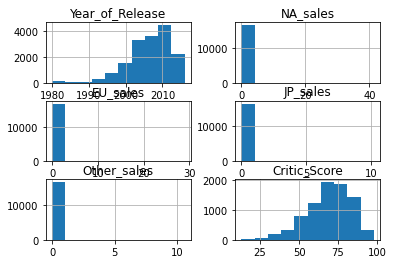

In [6]:
data.hist();

* **Краткие итоги:**

1. Мы загрузили данные из датафрейма и сохранили его в переменной data.
2. Ознакомились с общими данными с помощью метода info().
- В датафрейме 16715 строк и 10 столбцов.
- В некоторых столбцах есть пропущенные значения.
- Обнаружили что в одном из столбцов (User_score) указан неправильный тип данных (не числовой).
- В столбце с указанием года выпуска игры формат float, который тоже необходимо будет заменить.
3. Построили предварительные гистограммы столбцов.
- При построении гистограмм заметили, что в столбцах с продажами в разных странах очень много околонулевых значений.

Более детальный анализ произведем в следующих разделах.

## Шаг 2. Подготовка данных. 

### Приведем к нижнему регистру названия столбцов.

Для того, чтобы не перебирать по отдельности названия каждого из столбцов - воспользуемся функцией, которая приведёт к нижнему регистру сразу все столбцы.

In [7]:
data.columns = [x.lower() for x in data.columns]
# перезапишем названия столбцов (data.columns) 
# приведем к нижнему регистру все значения 'x', 
# которые присутствуют в названии столбцов (data.columns)

In [8]:
data.head() 
# проверяем, что названия соответствуют нижнему регистру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы.

Как было замечено ранее, значения в столбце 'user_score' отображают оценки пользователей и должны быть в числовом формате, однако в нашей таблице эти значения отображены в формате object.

Также в изменении типа нуждаются значения, с указанием года выпуска игры - столбец - 'year_of_release'

In [9]:
#data['user_score'] = data['user_score'].astype(float)

При попытке преобразовать данные из строки в число с плавающей запятой мы получили ошибку.
Это может быть связано с тем, что помимо чисел, в данном столбце могут также присутствовать различные символы (запятые, точки, буквы и т.д.).

Т.е. для того чтобы преобразовать данные в нужный нам тип, для начала необходимо будет понять, что за символы присутствуют в данном столбце и обработать (заменить/удалить) данные символы из этого столбца, при необходимости.

In [10]:
data['user_score'].unique() 
# выведем список уникальных значений в данном столбце

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как видим, в нашем столбце помимо числовых значений присутвуют пропуски (nan) и значения типа 'tbd'.\
Насколько нам известно, аббревиатурой 'tbd' обозначают чаще всего один из нескольких вариантов выражений:
- To Be Determined - что означает - Будет определено
- To Be Done - что означает - Должно быть сделано
- To Be Discussed - что означает - Подлежит обсуждению.

Так как все варианты по большей части подразуемают одно и то же, и, учитывая, что в данном столбце должны быть рейтинги пользователей, сделаем предположение,
что в столбцах, в которых указано данное значение, скорее всего рейтинг ещё до конца **не определен** и будет изменяться с течением времени.

Может быть множество причин, почему рейтинги пользователей пока ещё **не определены**, но самым очевидным, как мне кажется, является вероятность того, что игра не выпущена в массовый сегмент (т.е. пользователи ещё не играли в эту игру).

А пока определим, у какого количества игр рейтинг ещё не определен.\
Для этого воспользуемся функцией count().

In [11]:
#Кол-во строк, где рейтинг пользователей не определен.

data[data['user_score'] == 'tbd'].count() 

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

Видим, что значение 'tbd' (неопределенный рейтинг) есть в 2424 строках.
А если учитывать, что всего ненулевых значений в данном столбце 10014, делаем вывод, что количество значений 'tbd' составляет около ~24% от всей выборки.

- У большого количества игр пользовательский рейтинг не определен.

Замена этих неопределенных значений ('tbd') на средние или медианные очень сильно исказит общую выборку.

Так как в данном столбце у нас также присутствуют отсутствующие значения, мы можем сделать предположение, что и там, и там оценки пользователей не были проставлены (по тем или иным причинам).

Поэтому примем ответственное решение:
- Приравняем к NaN все эти **не определенные** значения.

Для этого воспользуемся функцией, которая пробежится по всем значениям столбца.\
Там, где значения будут равны 'tbd' вернём значения NaN.\
Перезапишем значения в данном столбце.

In [12]:
def tbd_user_score(value):
    try:
        if value == 'tbd':
            return NaN
        else:
            return value
    except:
        pass

Перезапишем значения в столбце 'user_score' с использованием значений, полученных благодаря функции tbd_user_score.

In [13]:
# Перезаписываем значения в столбце используя свою функцию (вместо 'tbd' - NaN)

data['user_score'] = data['user_score'].apply(tbd_user_score)

Снова попробуем изменить тип данных в столбце 'user_score'

In [14]:
# Меняем тип данных на int

data['user_score'] = data['user_score'].astype(float)

Как видим, сообщения об ошибке не возникло, значит формат столбца успешно был изменен.

Теперь изменим тип значений в столбце 'year_of_realease' на 'int'.


Для начала все отсутствующие значения приравняем к нулю, а затем уже перезапишем сам тип данных.\
(Приравнять к нулю отсутствующие данные мы можем, так как общее количество пропущенных данных в этом столбце не превышает 1% от общей выборки (всего 269 пропусков)

In [15]:
# Заменяем все пропущенные значения на нулевые.

data['year_of_release'] = data['year_of_release'].fillna(0)

In [16]:
# Удаляем все пропущенные значения.

data['year_of_release'] = data['year_of_release'].dropna()

In [17]:
# Меняем тип данных в столбце 'year_of_release'.

data['year_of_release'] = data['year_of_release'].astype('int')

Проверим, что типы значений в данных столбцах изменились.

In [18]:
# Проверяем, что типы значений изменились в нужных нам столбцах.

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Как видим, типы данных были успешно изменены.

Можем приступать к следующему пункту.

### Обработка пропусков.

Для того чтобы просмотреть общее количество пропущенных значений во всех столбцах воспользуемся функцией isna().

In [19]:
data.isna().sum() # выводим на экран суммарное кол-во пропущенных значений.

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Как видим, пропущенные значения присутствуют только в 5 столбцах.\
(В столбце year_of_release - пропущенные значения мы заменили на нулевые, для того, чтобы преобразовать тип данных в int).\
Вопросы, касающиеся значения 'tbd' в столбце 'user_score' были рассмотрены в предыдущем разделе 2.2.\
В столбцах name и year_of_realease всего по 2 пропуска.\
Так как пропущенных значений очень мало и, так как пропущенные значения нельзя заменить нулевыми значениями - оставим их как есть.

В столбцах 'Critic_Score','User_Score', 'Rating ' - очень большое количество пропущенных значений (от 40% - до 55%).

Это значит что любые предположения по данным столбцам можно делать только с большой долей осторожности. (Погрешность будет очень большой).

В данный момент сложно определить, имеет ли смысл заменять пропущенные значения (рейтинги) на медианные/средние или какие-либо ещё, поэтому пока что оставим всё так, как есть. 
А позже уже решим что делать с пропущенными значениями в данных столбцах.


Так как пропуски в столбцах [name] и [genge] составляют менее 2% от общего числа строк - принимаем решение их удалить.\
Пропуски в столбце [rating] заменим на значение ['рейтинга нет']


In [20]:
# Удаляем все пропущенные значения в столбцах name и genre.

data = data.dropna(subset=['name', 'genre'])

In [21]:
# Заменяем пропущенные значения в столбце rating на выражение 'рейтинга нет'

data['rating'] = data['rating'].fillna('рейтинга нет')

In [22]:
data.isna().sum() # выводим на экран суммарное кол-во пропущенных значений.

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Подсчет сумманых продаж игр во всех регионах.

Для того, чтобы подсчитать суммарные продажи игры во всех регионах нам необходимо будет сложить значения в следующих столбцах:
- na_sales - продажи в Северной Америке       
- eu_sales - продажи в Европе      
- jp_sales - продажи в Японии
- other_sales - продажи в других странах

Создадим новый столбец с названием 'total_sales' и сохраним туда суммарное значение продаж во всех регионах.

In [23]:
data['total_sales'] = (data['na_sales'] + 
                       data['eu_sales'] +
                       data['jp_sales'] +
                       data['other_sales'])

In [ ]:
#data['total_sales']  = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
# Выводим на экран получившиеся значения в новом столбце total_sales.
data['total_sales'] 

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

### Краткие выводы по Шагу 2.

Итак, в Шаге 2 мы подготавливали данные к дальнейшему исследовательскому анализу.

Нами были совершены следующие действия:

- Мы заменили названия столбцов (привели их к нижнему регистру).
- Преобразовали данные в нужные типы\
(заменили тип данных в столбцах 'user_score' и 'year_of_release')
- Заменили пропущенные значения на нулевые в столбце 'year_of_release'\
(общее количество пропущенных значений было меньше 1%).
- Определили вероятную аббревиатуру значения 'tbd' - (**не определенный**), и приняли решение удалить данные значения из столбца (приравнять **не определенные** значения к отсутствию значений в столбце).
- Создали новый столбец 'total_sales' и записали туда суммарное количество продаж игры во всех регионах.

## Шаг 3. Проведение исследовательского анализа.

### Определяем какое количество игр выпускалось в разные годы

Для определния количества игр, выпускаемых в разные годы необходимы сгруппировать данные по столбцу 'year_of_realease' и посчитать сумму, при помощи функции count()

In [25]:
data.groupby('year_of_release')['name'].count()

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

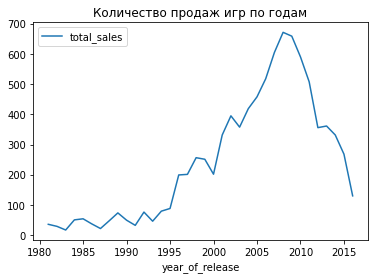

In [26]:
# график количества выпущенных игр за весь рассматриваемый период
(data.query('year_of_release>1980')
 .pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
 .plot(y='total_sales', kind='line', title = 'Количество продаж игр по годам')
);

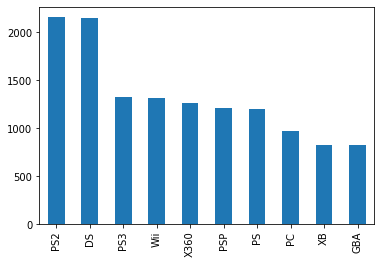

In [27]:
# Не обязательно, но тут мы рассматривали, на каких платформах чаще всего выпускались игры.

plat = data['platform'].value_counts().head(10)
plat.plot.bar();

* **Краткие выводы:**

Из полученных данных можем сделать следующие наблюдения:
- Количество выпускаемых игр росло вплоть до 2008 года.
- Максимальное количество выпущенных игр было в 2008 году - 1427 игр.
- После кризиса 2008-2009 годов - количество выпускаемых игр начало уменьшаться. (Возможно это связано с тем, что игры стали более сложными и многоуровневыми и на их создание и поддержание стало уходить намного больше времени).
- наибольшая доля выпущенных игр приходилась на период с 2002 по 2012 годы.
(11405 игр из 16750 - ~68% всех игр).
- количество игр, выпущенных до 1994 равно 783 (что составляет менее 5% от общей выборки выпущенных игр).
- конечно, любые данные являются важными!!! однако если рассматривать общую совокупность данных, то как и было указано ранее - кол-во игр выпущенных до 1994 года не играет большой в общем количестве выпущенных игр (менее 5%).
- наиболее популярными платформами, выпускающими большое количество игр - являлись следующие платформы: PS2 (PlayStation 2), DS (Nintendo DS), PS3 (Playstation 3).


### Определяем как менялись продажи по платформам.

Для определения того, как менялись продажи по платформам необходимо будет сгруппировать данные по столбцу 'platform' и посчитать суммарное значение продаж из столбца 'total_sales', применив функцию sum().

In [28]:
# группируем, вычисляем сумму

dgb = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
dgb

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

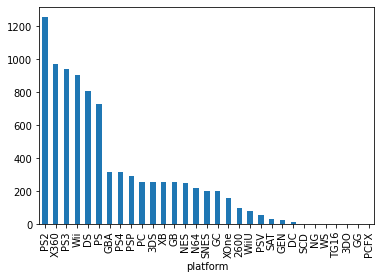

In [29]:
dgb.plot.bar(); # строим график суммарных продаж игр с разбивкой(группировкой) по платформам

- Как видим, наибольшее количество продаж приходилось на игры, выпущенные на платформе PS2 (PlayStation 2)
- На втором месте расположились игры выпущенные на платформе X360 (Xbox 360)
- На третьем месте - PS3(PlayStation 3)
- На четвертом месте - Wii (Nintendo Wii)
- На пятом месте - DS (Nintendo DS)

Теперь определим количество продаж отдельно по каждой платформе.
Графики будем строить в том же порядке: PS2, X360, PS3, Wii, DS.

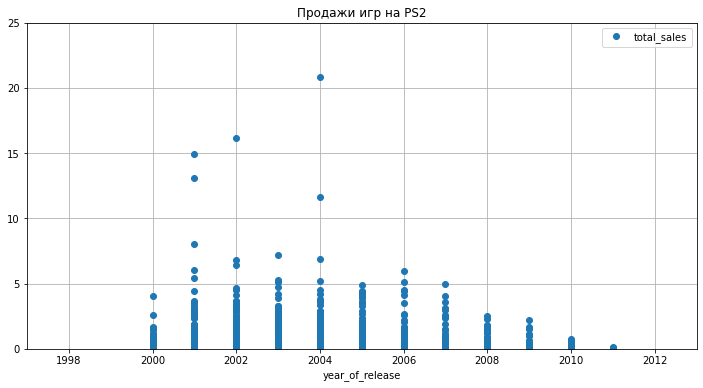

In [30]:
# строим график количества продаж игр на платформе PS2 по отношению к году, когда они продавались.
(data.query('platform == "PS2"') 
    .plot(x='year_of_release', y='total_sales', 
          ylim=(0, 25), xlim=(1997, 2013),
          style='o', grid=True, figsize=(12, 6), title ='Продажи игр на PS2')
);

Согласно графику - игры на платформе **PS2 (PlayStation 2)** продавались в с 2000 по 2011 год.\
Пик продаж приходился на 2004 год, после чего продажи игр на данной платформе в основном падали со временем.\
Суммарно игры на платформе PS2 продавались 12 лет.

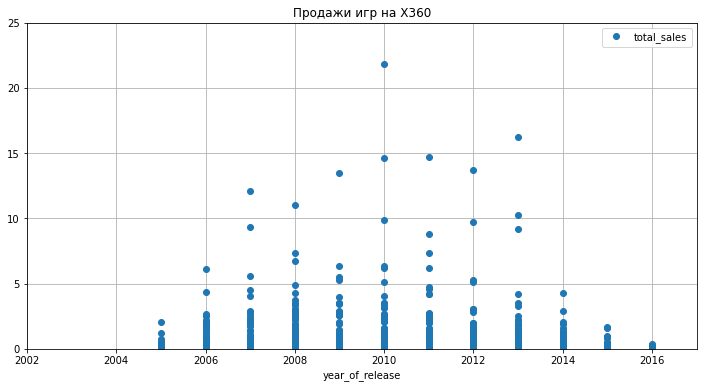

In [31]:
# строим график количества продаж игр на платформе X360 по отношению к году, когда они продавались.
(data.query('platform == "X360"') 
    .plot(x='year_of_release', y='total_sales', 
          ylim=(0, 25), xlim=(2002, 2017),
          style='o', grid=True, figsize=(12, 6), title ='Продажи игр на X360')
);

Согласно графику - игры на платформе **X360 (Xbox 360)** продавались в с 2005 по 2016 год.\
Пик продаж приходился на 2010 год, после чего продажи игр на данной платформе в основном падали со временем.\
Суммарно игры на платформе X360 продавались 12 лет.

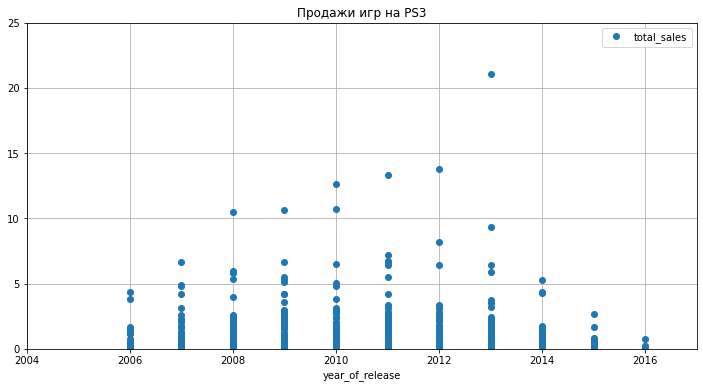

In [32]:
# строим график количества продаж игр на платформе PS3 по отношению к году, когда они продавались.
(data.query('platform == "PS3"') 
    .plot(x='year_of_release', y='total_sales', 
          ylim=(0, 25), xlim=(2004, 2017),
          style='o', grid=True, figsize=(12, 6), title ='Продажи игр на PS3')
);

Согласно графику - игры на платформе **PS3 (PlayStation 3)** продавались в с 2006 по 2016 год.\
Пик продаж приходился на 2011-2013 годы, после чего продажи игр на данной платформе в основном падали со временем.\
Суммарно игры на платформе PS3 продавались 11 лет.

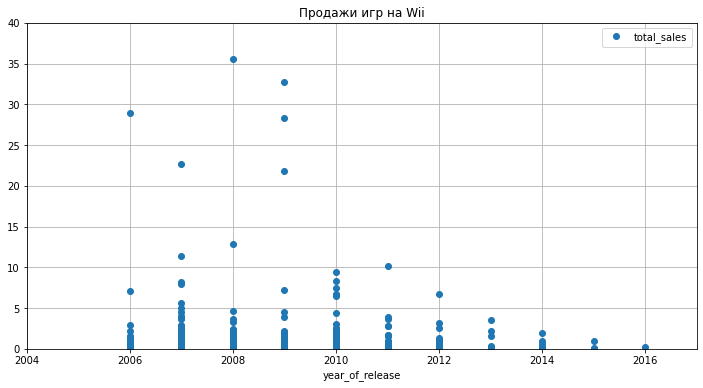

In [33]:
# строим график количества продаж игр на платформе Wii по отношению к году, когда они продавались.
(data.query('platform == "Wii"') 
    .plot(x='year_of_release', y='total_sales', 
          ylim=(0, 40), xlim=(2004, 2017),
          style='o', grid=True, figsize=(12, 6), title ='Продажи игр на Wii')
);

Согласно графику - игры на платформе **Wii (Nintendo Wii)** продавались в с 2006 по 2016 год.\
Пик продаж приходился на 2008-2009 годы, после чего продажи игр на данной платформе в основном падали со временем.\
Суммарно игры на платформе PS3 продавались 11 лет.

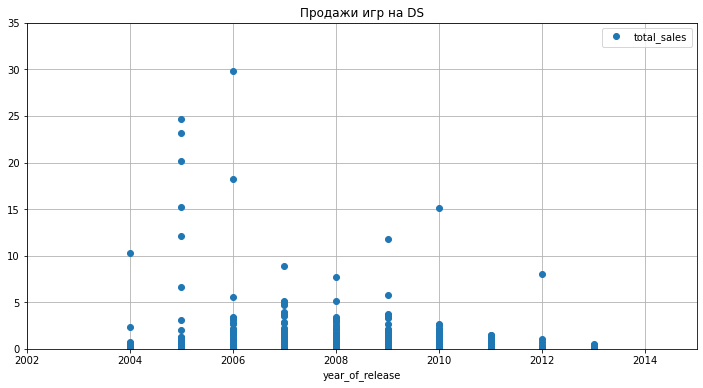

In [34]:
# строим график количества продаж игр на платформе DS по отношению к году, когда они продавались.
(data.query('platform == "DS"') 
    .plot(x='year_of_release', y='total_sales', 
          ylim=(0, 35), xlim=(2002, 2015), style='o', 
          grid=True, figsize=(12, 6), title ='Продажи игр на DS')
);

Согласно графику - игры на платформе **DS (Nintendo DS)** продавались в с 2004 по 2013 год.\
Пик продаж приходился на 2005-2006 годы, после чего продажи игр на данной платформе в основном падали со временем.\
Суммарно игры на платформе PS3 продавались 10 лет.

* **Краткие выводы:**
    
    1. Нами было просмотрено, как менялись продажи по платформам с течением времени.
    2. Мы обнаружили, что наибольшее количество продаж игр приходилось на следующие платформы: PS2, X360, PS3, Wii, DS.
    3. Суммарный пик продаж игр на всех платформах был в период с 2005 по 2012 годы.
    4. Было обнаружено, что в среднем игры на каждой из платформ выпускаются (продаются) от 10 до 12 лет.
    5. Грубо говоря - от 10 до 12 лет - это средний срок жизни платформы, по истечению которого, старые платформы исчезнают, а вместо них появляются новые.

### Определение актуального периода для построения прогноза продаж на 2017 год.

На самом деле определение актуального периода, для построения прогноза продаж на 2017 год, очень специфическое занятие и носит сугубо субъективный характер.
Так как никто не может предугадать, что ожидает нас в будущем.

Никто не застрахован от "Черных лебедей" и малопредсказуемых событий, которые происходят в мире начиная от пандемии и заканчивая геополитической обстановкой в мире.

Однако, если мы опустим данные формальности, и попробуем сосредоточится только на задаче прогнозирования, то можно было бы, как один из вариантов, взять период с 2000 года по текущий момент.

Таким образом, у нас остались бы все исторические данные, включающие в себя весь средний срок жизни наиболее популярных платформ (10-12 лет) и последние годы, которые являются Наиболее важными для прогнозов.

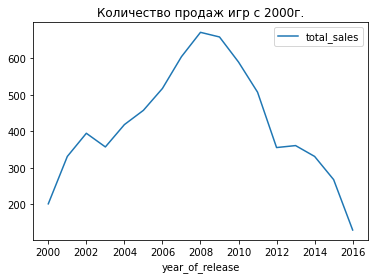

In [35]:
# делаем срез данных с 2000 года и строим график суммарных продаж по годам.
(data.query('year_of_release>1999') 
 .pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
 .plot(y='total_sales', kind='line', title = 'Количество продаж игр c 2000г.')
);

Однако как бы ни были полезны все эти исторические данные, мы понимаем, что со временем все платформы уходят в прошлое, а прогресс развивается по экспоненте, так что, для более точного прогноза нам понадобятся данные только за последние несколько лет. 

Таким образом, мы будем рассматривать только последние 3 года.

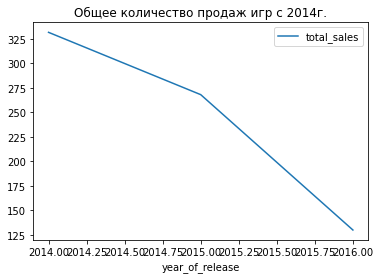

In [36]:
# делаем срез данных с 2014 года и строим график суммарных продаж по годам.
(data.query('year_of_release>2013') 
 .pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
 .plot(y='total_sales', kind='line',
       title = 'Общее количество продаж игр c 2014г.')
);

### С этого момента не учитываем данные за предыдущие годы.

Для того, чтобы оставить данные только за определенный период сделаем срез данных с помощью функции query().

Изначально планировалось рассматривать сразу 2 временных отрезка:
1. с 2000 по 2016
2. с 2014 по 2016

Однако произведя некоторые подсчеты и осознав, что наибольшую актуальность для прогнозирования показывают только данные за последние годы, было принято решение рассматривать **только срез данных с 2014 года**.

Создадим новую переменную 'new_data' и поместим туда срез данных с 2014 по 2016 годы

In [37]:
new_data = data.query('year_of_release>2013') # делаем срез данных

In [38]:
new_data = new_data.reset_index(drop=True) # сбрасываем индексы

In [39]:
new_data.head() # смотрим, что получилось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,рейтинга нет,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,рейтинга нет,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,рейтинга нет,7.98


### Определяем какие платформы лидируют по продажам.

В прошлых пунктах нами было обнаружено 5 наиболее популярных платформ, которые приносили наибольшие прибыли в прошлом.\
Это:
1. PS2 (PlayStation 2)
2. X360 (Xbox 360)
3. PS3(PlayStation 3)
4. Wii (Nintendo Wii)
5. DS (Nintendo DS)

Однако, как мы могли заметить, продажи на платформах PS2 и Wii к 2016 году упали окончательно.

Но, как было указано ранее, всё это исторические данные.

Для прогнозирования продаж в будущем будем рассматривать только данные за последние 3 года.


In [40]:
# группируем, вычисляем сумму
ndgb = new_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
ndgb

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

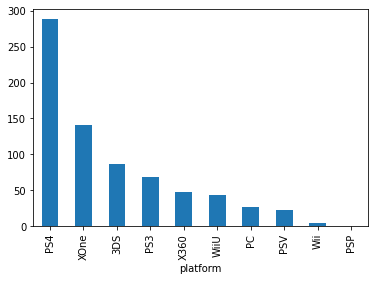

In [41]:
ndgb.plot.bar(); # выводим на экран столбчатые диаграммы по количеству продаж на каждой из платформ

После проведения среза данных с 2013 года - у нас изменились топ-3 лидера, по продажам.\
Теперь наиболее популярными платформами являются:

1. PS4 - (PlayStation4)
2. XOne - (Xbox One)
3. 3DS - (Nintendo 3DS)


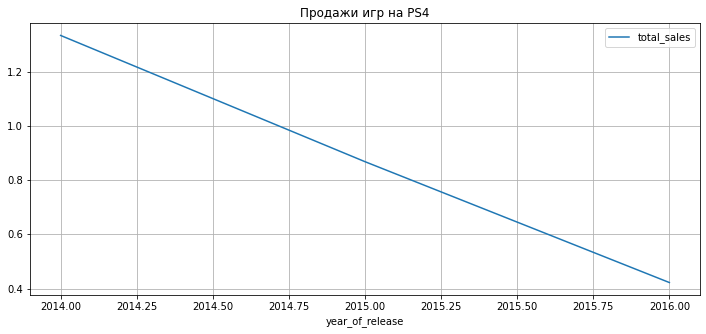

In [42]:
(new_data.query('platform == "PS4"')
                   .pivot_table(index='year_of_release', values='total_sales')
                   .plot(grid=True, figsize=(12,5),
                         title='Продажи игр на PS4')
                  );

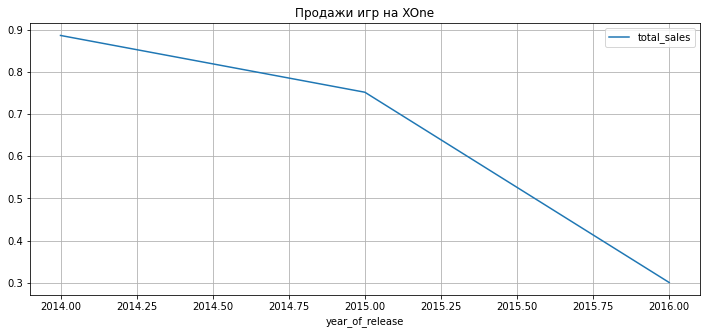

In [43]:
(new_data.query('platform == "XOne"')
                   .pivot_table(index='year_of_release', values='total_sales')
                   .plot(grid=True, figsize=(12,5),
                         title='Продажи игр на XOne')
                  );

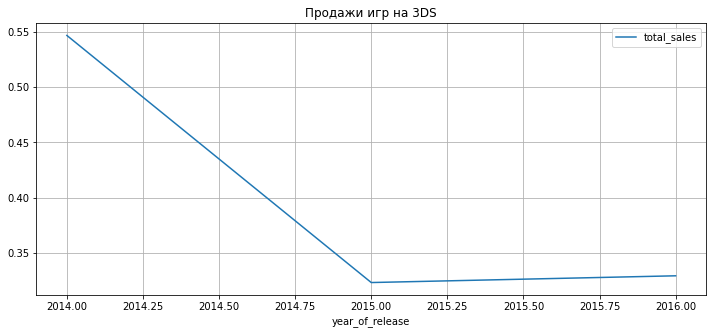

In [44]:
(new_data.query('platform == "3DS"')
                   .pivot_table(index='year_of_release', values='total_sales')
                   .plot(grid=True, figsize=(12,5), 
                         title='Продажи игр на 3DS')
                  );

Мы рассмотрели какое количество прибыли принесли разные платформы.

Чисто ради интереса ещё рассмотрим, какие платформы являются самими популярными, учитывая количество выпущенных игр на данных платформах.

Проанализируем динамику продаж по всем платформам c 2014 года.

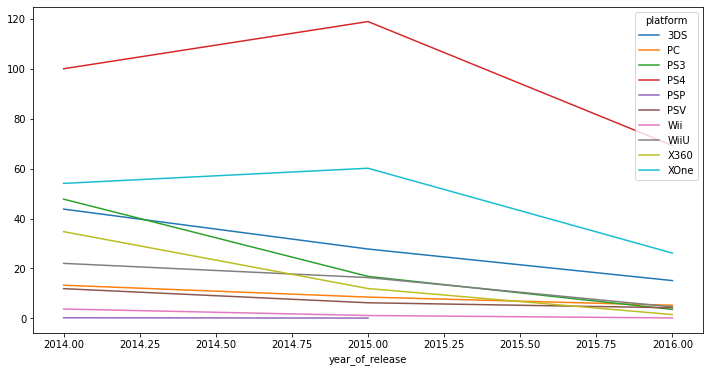

In [45]:
# создаем переменную sales_dinamics которая демострирует нам динамику суммарных продаж по платформам
dinamics = new_data.groupby('platform').sum()['total_sales'].sort_values(
    ascending=False).index.values[:10]

sales_dinamics = new_data[new_data.platform.isin(dinamics)]
sales_dinamics = sales_dinamics.pivot_table(index='year_of_release',
                                            columns='platform', values='total_sales', aggfunc='sum')
sales_dinamics.plot(figsize=(12,6));

Как видим из графика, динамика продаж практически на всех платформах падает в последние несколько лет.\
Продажи на некоторых платформах и вовсе устремились к нулевым значениям.\
Наибольшая относительная динамика у платформ PS4, XOne, 3DS.\
Наименьшая динамика продаж у платформ PSP (продажи прекратились окончательно), Wii (продажи стремятся к нулю).

Согласно полученному графику, наибольшее количество игр и наилучшая динамика продаж у игр, выпущенных после 2013 года принадлежит платформе PS4

* **Краткие выводы:**

Рассмотрев общие продажи и динамику продаж за последние 3 года мы сделали следующие наблюдения:

1. Продажи почти по всем платформам за последние 3 года в основном уменьшаются (исключением является платформа 3DS (Nintendo 3DS).
2. Наибольшее кол-во игр было выпущено (после 2013 года) следующими платформами: 
- PS4 - (PlayStation4)
- PSV - (PlayStation Vita)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)
3. Наиболее прибыльными платформами (после 2013 года) являлись следующие 3 платформы:
- PS4 - (PlayStation4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)

### Строим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

Для построения так называемого "ящиека с усами" (диаграммы размаха) воспользуемся функцией .boxplot().\
Применим её к нашему срезу данных от 2014 года (new_data).\
Сгруппируем данные по платформам.

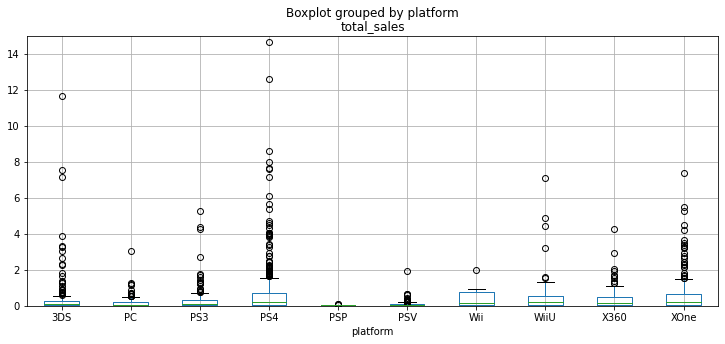

In [46]:
new_data.boxplot(by='platform', column='total_sales', figsize =(12,5))
plt.ylim(0, 15);

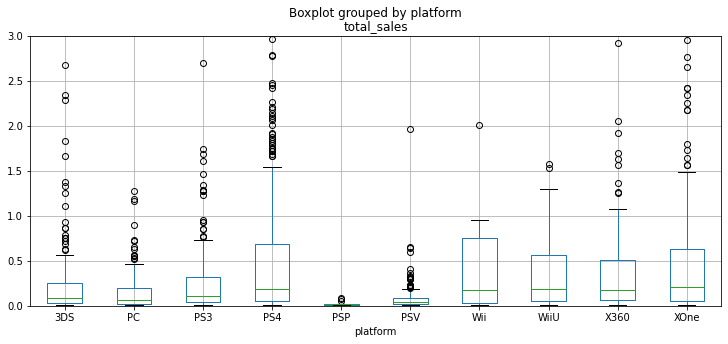

In [47]:
new_data.boxplot(by='platform', column='total_sales', figsize =(12,5))
plt.ylim(0, 3);

Как видим, диаграмма размаха (ящик с усами) показывает нам те же самые данные, которые мы получили в предыдущем пункте, а именно - то, что наиболее прибыльными платформами в последние годы являлись следующие платформы:
- PS4 - (PlayStation4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)


В дополнение к диаграммам размаха рассмотрим медианные значения суммарных продаж по каждой из платформ.


In [48]:
# рассматриваем медианные значения продаж по каждой из платформ.

ndgbm = new_data.groupby('platform')['total_sales'].median().sort_values(ascending=False)
ndgbm

platform
XOne    0.205
WiiU    0.190
PS4     0.185
Wii     0.180
X360    0.180
PS3     0.110
3DS     0.090
PC      0.060
PSV     0.040
PSP     0.020
Name: total_sales, dtype: float64

Как видим, наибольшие медианные значения продаж принадлежат платформам XOne, WiiU, PS4.\
Наименьшие медианные значения продаж принадлежат следующим платформам: PC, PSV, PSP 

Интересно, какой бы график мы получили, если бы рассматривали абсолютно все продажи за весь период продаж.\
(Просто ради интереса строим подобный график).\
Чтобы график не отвлекал от исследования - я его закомментировал.\
При желании можно раскомментировать следующую строчку.

In [49]:
# data.boxplot(by='platform', column='total_sales', figsize =(12,5))
# plt.ylim(0, 41);

* **Краткие выводы:**

Мы построили и рассмотрели диаграммы размаха ('ящик с усами') по глобальным продажам игр в разбивке по платформам.

1. Согласно полученным диаграммам делаем вывод, что наиболее прибыльными платформами (после 2013 года) являлись следующие 3 платформы:
- PS4 - (PlayStation4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)

2. Согласно вычисленным медианным значениям, выводы немного отличаются. Так к примеру мы обнаружили, что:

- Наибольшие медианные значения продаж принадлежат платформам XOne, WiiU, PS4.
- Наименьшие медианные значения продаж принадлежат следующим платформам: PC, PSV, PSP

т.е. другими словами, не смотря на абсолютное количество проданных игр на платформе 3DS, медианное значение продаж на этой платформе меньше почти в 2 раза, чем количество продаж на платформе WiiU.

### Смотрим как влияют на продажи отзывы пользователей и критиков.

Для того, чтобы посмотреть, как влияют на продажи отзывы пользователей и критиков, построим диаграммы рассеимвания и посчитаем корреляцию между отзывами и продажами.

Для удобства, предлагаю начать рассмотрение с наиболее популярных платформ: 
- PS4 (PlayStation 4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)

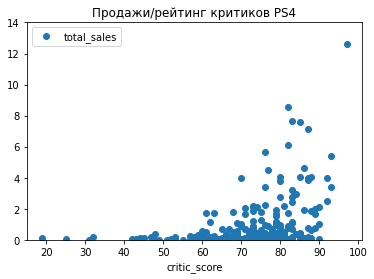

In [50]:
new_data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', 
                                         style='o', ylim=(0, 14),
                                         title='Продажи/рейтинг критиков PS4');

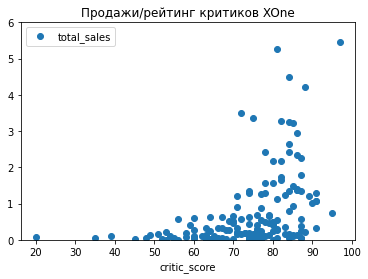

In [51]:
new_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', 
                                         style='o', ylim=(0, 6),
                                          title='Продажи/рейтинг критиков XOne');

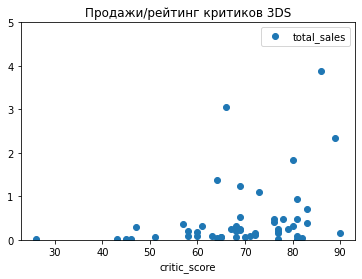

In [52]:
new_data.query('platform == "3DS"').plot(x='critic_score', y='total_sales', 
                                         style='o', ylim=(0, 5),
                                         title='Продажи/рейтинг критиков 3DS');

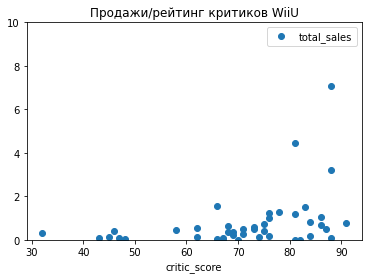

In [53]:
new_data.query('platform == "WiiU"').plot(x='critic_score', y='total_sales', 
                                         style='o', ylim=(0, 10),
                                         title='Продажи/рейтинг критиков WiiU');

Диаграммы рассеивания показывают нам следующую закономерность:

- Согласно графикам - оценки критиков вероятно немного влияют на количество продаж игр внутри одной платформы.
- Зависимость прямо пропорциональная. (Точное значение узнаем, когда посчитаем корреляцию).
- Согласно графикам, наибольшее количество продаж приходится на игры, которым критики проставили рейтинг выше 60 баллов (по 100 бальной системе).

Теперь посмотрим на отношение продаж к оценкам пользователей.\
Точно также для начала построим диаграммы рассеивания.

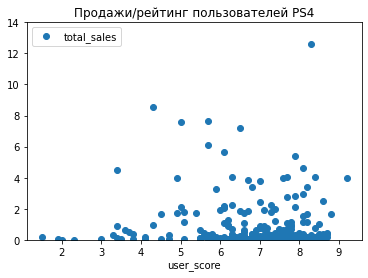

In [54]:
new_data.query('platform == "PS4"').plot(x='user_score', y='total_sales', 
                                         style='o', ylim=(0, 14),
                                         title='Продажи/рейтинг пользователей PS4');

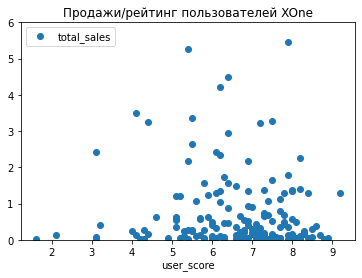

In [55]:
new_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', 
                                         style='o', ylim=(0, 6),
                                          title='Продажи/рейтинг пользователей XOne');

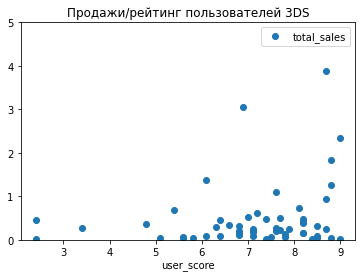

In [56]:
new_data.query('platform == "3DS"').plot(x='user_score', y='total_sales', 
                                         style='o', ylim=(0, 5),
                                         title='Продажи/рейтинг пользователей 3DS');

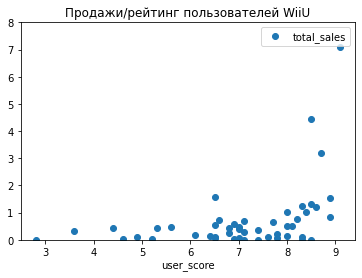

In [57]:
new_data.query('platform == "WiiU"').plot(x='user_score', y='total_sales', 
                                         style='o', ylim=(0, 8),
                                         title='Продажи/рейтинг пользователей WiiU');

Диаграммы рассеивания с рейтингами пользователей получились неоднозначными:

- Согласно графикам - как мне кажется, можно сделать вывод, что пользователи чаще ставят более высокие оценки играм, однако прямая зависимость между продажами и рейтингами выглядит слабее, чем зависимость продаж от рейтингов критиков.
- Для более детального анализа посчитаем корреляцию данных.

Если мы будем рассматривать корреляцию между оценками критиков/пользователей ко всем продажам на всех платформах, мы получим следующие значения:

In [58]:
list=['critic_score', 'user_score']

for value in list:
    correlation = new_data['total_sales'].corr(new_data[value])
    print(f'Корреляция между total_sales и {value} на платформе PS4\
 составляет: {correlation:0.2};')

Корреляция между total_sales и critic_score на платформе PS4 составляет: 0.33;
Корреляция между total_sales и user_score на платформе PS4 составляет: -0.013;


Мы построили простейшую функцию с перебором значений и посчитали общую корреляцию между общими продажами (на всех платформах) в отношении к рейтингам критиков и пользвателей.

Как результат - мы получили следующие значения:
- Корреляция между total_sales и critic_score составляет: 0.33; коррелияция средняя положительная.
- Корреляция между total_sales и user_score составляет: -0.013; коррелияция слабая отрицательная

~~Это значит, что рейтинги критиков, как мы писали ранее, напрямую влияют на количество продаваемых игр.~~

В то же время рейтинги пользователей почти не играют роли в продажах.

Это значит, что мы не можем с большой уверенностью сказать, что рейтинги критиков никак не влиют на общее количество продаж.\
    Возможно зависимость есть, но она не сильно выражена.

Теперь давайте рассмотрим отдельно корреляцию по каждой из трёх выбранных нами платформ.
- PS4 (PlayStation 4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)

Корреляция на платформе PS4 (PlayStation 4)

In [59]:
list=['critic_score', 'user_score']

for value in list:
    correlation = new_data.query('platform == "PS4"')\
    ['total_sales'].corr(new_data[value])
    print(f'Корреляция между total_sales и {value} на платформе PS4\
 составляет: {correlation:0.2};')

Корреляция между total_sales и critic_score на платформе PS4 составляет: 0.4;
Корреляция между total_sales и user_score на платформе PS4 составляет: -0.04;


Корреляция на платформе XOne - (Xbox One)

In [60]:
list=['critic_score', 'user_score']

for value in list:
    correlation = new_data.query('platform == "XOne"')\
    ['total_sales'].corr(new_data[value])
    print(f'Корреляция между total_sales и {value} на платформе XOne\
 составляет: {correlation:0.2};')

Корреляция между total_sales и critic_score на платформе XOne составляет: 0.43;
Корреляция между total_sales и user_score на платформе XOne составляет: -0.07;


3DS - (Nintendo 3DS)

In [61]:
list=['critic_score', 'user_score']

for value in list:
    correlation = new_data.query('platform == "3DS"')\
    ['total_sales'].corr(new_data[value])
    print(f'Корреляция между total_sales и {value} на платформе 3DS\
 составляет: {correlation:0.2};')

Корреляция между total_sales и critic_score на платформе 3DS составляет: 0.31;
Корреляция между total_sales и user_score на платформе 3DS составляет: 0.22;


Значения корреляций между продажами внутри одной популярной платформы и отзывами пользователей и критиков дали нам примерно тот же результат, что и общая корреляция продаж/отзывам.

Корреляция между продажами и оценками критиков варьируется в диапазоне:\
(0.31 - 0.43).\
Корреляция между продажами и оценками пользователей варьируется в диапазоне:\
(-0.07 до 0.22).

**Краткие выводы:**

1. Нами были построены диаграммы рассеивания и рассмотрены/рассчитаны отношения между продажами и отзывами критиков/пользователей.
2. И диаграммы рассеивания и рассчитаная корреляция дали нам примерно похожие результаты.
3. Сложно сказать, существует ли прямая зависимость количества продаж от оценок критиков.\
(корреляция вроде как есть, средняя, положительная (0.31-0.43).\
Однако данная корреляция выражена не четко (не очень сильно (корреляция меньше 0.5)), и, как следствие, мы не можем однозначно утверждать, что зависимость между оценкой критиков и продажами есть, но в то же время, мы и не можем полностью опровергуть эту теорию.\
    **Можно сказать, что согласно полученным данным, невозможно сделать однозначные выводы о наличии или отсутствии зависимости продаж от оценок критиков.**

4. В то же время, согласно полученным значениям по оценкам пользователей, видим, что зависимость между отзывами пользователей и продажами игр ещё меньше, чем зависимость между отзывами критиков и продажами.\
(Корреляция почти нулевая)\
И хоть мы и не можем, также однозначно заявлять, что оценки пользователей вообще никак не влияют на количество продаж, но, по нашим наблюдениям, отзывы пользователей если и влияют на количество продаж, то данное влияние практически незаметно.
    
5. Не забываем, что в данных с рейтингами пользователей/критиков у нас отсутствует огромное количество значений, а значит любые выводы, которые мы можем сделать, мы делаем с огромной оговоркой (с погрешностью почти в 50%).
    
    Как итог, повторюсь, **невозможно сделать однозначные выводы о наличии или отсутствии зависимости между продажами и оценками.**


### Соотносим выводы с продажами игр на других платформах.

В прошлом разделе мы рассматривали зависимость между оценками критиков/пользователей и количеством продаж на самых популярных платформах.

Нами были получены неоднозначные результаты.

Зависимость количества продаж от рейтингов критиков показала среднюю положительную корреляцию.\
При таких значениях очень сложно говорить, есть ли зависимость от оценок критиков на продажи или нет.\
В то же время мы не можем однозначно и отвергуть данную теорию, сказав, что зависимости абсолютно точно нет.\
Как итог:\
Можно сказать, что согласно полученным данным, невозможно сделать однозначные выводы о наличии или отсутствии зависимости.

Зависимость рейтингов пользователей на продажи показала низкую корреляцию.\
И, хоть мы и не можем однозначно утверждать, что оценки пользователей никак не влияют на количество продаж, но по нашим наблюдениям, отзывы пользователей если и влияют на количество продаж, то данное влияние практически незаметно.\
Опять же повторимся, учитывая количество пропущенных значений в данных столбцах, делаем вывод, что наши расчеты не могут дать одназначные результаты на данный вопрос.

Попробуем теперь рассчитать корреляцию общих продаж на всех платформах, к оценкам критиков и пользоватлей.


In [62]:
#создадим новый, отдельный список со значеними за выбранный период 
#(после 2014 года)

new_plat = new_data[new_data.platform.isin(dinamics)] 

In [63]:
new_plat = new_plat.dropna() # Для расчета корреляции удаляем NaN-значения 

In [64]:
# группируем значения по платформам

new_plat_grouped = new_plat.groupby('platform').sum()
new_plat_grouped

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
3DS,94697,7.80,5.25,9.94,1.22,3299.0,343.8,24.21
PC,231733,6.89,15.24,0.00,1.68,8773.0,729.3,23.81
PS3,72505,4.14,3.84,1.77,1.61,2396.0,227.9,11.36
PS4,471554,74.79,101.69,8.49,34.23,16897.0,1598.8,219.20
PSV,106775,1.60,1.35,4.06,0.91,3832.0,417.2,7.92
WiiU,84623,14.94,10.64,5.78,2.47,2985.0,303.5,33.83
X360,52364,5.63,3.53,0.04,0.90,1657.0,159.7,10.10
XOne,304280,66.71,38.03,0.27,10.28,11193.0,999.7,115.29


In [65]:
# в новой переменной сохраним только индексы названий столбца платформ

new_plat_list = new_plat_grouped.index.values
new_plat_list

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne'],
      dtype=object)

Рассчитаем корреляцию между оценкой критиков и общими продажами для всех платформ.

In [66]:
print('Корреляции между оценками критиков и общими продажами:\n')
for platform in new_plat_list:
    correlation = new_data[new_data['platform']==platform].corr().loc['critic_score', 'total_sales']
    print(f'Платформа: {platform} Корреляция составляет: {correlation:0.2};')

Корреляции между оценками критиков и общими продажами:

Платформа: 3DS Корреляция составляет: 0.31;
Платформа: PC Корреляция составляет: 0.17;
Платформа: PS3 Корреляция составляет: 0.45;
Платформа: PS4 Корреляция составляет: 0.4;
Платформа: PSV Корреляция составляет: 0.043;
Платформа: WiiU Корреляция составляет: 0.37;
Платформа: X360 Корреляция составляет: 0.53;
Платформа: XOne Корреляция составляет: 0.43;


Рассчитаем корреляцию между оценкой пользователей и общими продажами для всех платформ.

In [67]:
print('Корреляции между оценками пользователей и общими продажами:\n')
for platform in new_plat_list:
    correlation = new_data[new_data['platform']==platform].corr().loc['user_score', 'total_sales']
    print(f'Платформа: {platform} Корреляция составляет: {correlation:0.2};')

Корреляции между оценками пользователей и общими продажами:

Платформа: 3DS Корреляция составляет: 0.22;
Платформа: PC Корреляция составляет: -0.072;
Платформа: PS3 Корреляция составляет: -0.17;
Платформа: PS4 Корреляция составляет: -0.04;
Платформа: PSV Корреляция составляет: -0.17;
Платформа: WiiU Корреляция составляет: 0.41;
Платформа: X360 Корреляция составляет: -0.14;
Платформа: XOne Корреляция составляет: -0.07;


* **Краткие выводы:**

1. Мы рассмотрели корреляции между оценками критиков/пользователей и продажами на всех платформах.
2. По большей части выводы можно соотнести с выводами из предыдущего раздела.
3. Мы заметили что в среднем корреляци между оценкой критиков и продажами варьируется в следующем диапазоне:
- (0.17 - 0.53).
4. В основном корреляция не превышает значения 0.5, а это значит, что нельзя наверняка утверждать о том, что зависимость между оценкой критиков и продажами есть, но в то же время, мы и не можем полностью опровергуть эту теорию.\
(из тех данных, что мы имеем, мы можем осторожно предположить, что зависимость скорее есть, чем её нет - но это не точно).
5. Корреляция между оценкой пользователей и продажами варьируется в следующей диапазоне:
- (-0.17 - 0.41).
6. Корреляция между оценками пользователей и продажами ещё меньше, чем корреляция между оценкой критиков/продажами, и также, не превышает значения 0.5, а это значит что нельзя наверняка утверждать о том, что зависимость между оценкой критиков и продажами есть, но в то же время мы не можем и полностью опровергнуть это теорию.

7. Учитывая, что в столбцах с оценками критиков/пользователей отсутствует огромное количество значений, мы можем сделать следующий вывод:

- **Невозможно сделать однозначные выводы о наличии или отсутствии зависимости между продажами и оценками.**

Исходя из того, что в столбцах с оценками присутствует огромное количество пропущенных значений, а также учитывая, что корреляция в основном не превышает 0.5, делаем вывод, что невозможно сделать однозначеные выводы о наличии или отсутствии зависимости между продажами и оценками.

### Смотрим на общее распределение игр по жанрам.

Для начала рассмотрим общее количество выпущенных игр за выбранный нами период.

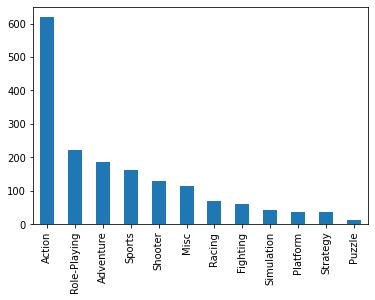

In [68]:
#рассматриваем общее количество игр за выбранный нами период
genre_count = new_data['genre'].value_counts().head(12)
genre_count.plot.bar();

- Как можно заметить из графика, наибольшее количество игр выпущенных в период с 2014 года носят жанр Action.
- На втором месте - Role-Playing (ролевые игры).
- На третьем месте - Adventure (приключенческие).
- На четвертом месте - Sports (спортивные игры).
- На пятом месте - Shooter (шутеры).

Теперь рассмотрим количество продаж игр по каждому из жанров.\
Для этого построим столбчатую диаграмму.\
Группируем значения по жанрам и считаем суммарные продажи.

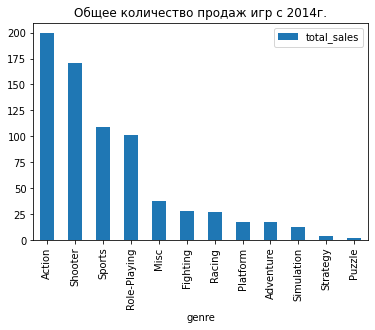

In [117]:
# делаем срез данных с 2014 года и строим график суммарных продаж по жанрам.
(new_data.pivot_table(index='genre',values='total_sales',aggfunc='sum')
 .sort_values(by=['total_sales'], ascending=False) # последние изменения - график отсортирован.
 .plot(y='total_sales', kind='bar',
       title = 'Общее количество продаж игр c 2014г.')
);

* **Краткие выводы:**


- Как видим из графика - наибольшую прибыль за рассматриваемый период принесли игры жанра Action.
- Вторыми по прибыльности были игры жанра Shooter.
- Третьими - игры жанра Sports.
- Четвертыми - игры жанра Role-Playing
- Пятыми - игры жанра Misc.


- Наименьшую прибыль принесли игры жанра (Puzzle и Strategy), ну оно и понятно, так как данных игр выходило меньше всего, за рассматриваемый нами период.

Учитывая, что нам (как компании производителю игр) нужно найти лучшую нишу, для создании максимально популярной игры, рассмотрим также медианные значения продаж за последние несколько лет и выявим, какие игры "в среднем" приносят наибольшую прибыль.

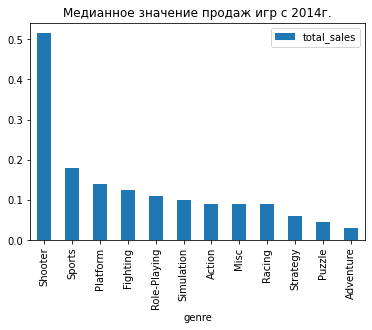

In [118]:
# делаем срез данных с 2014 года и строим график медианных продаж по жанрам.
(new_data.pivot_table(index='genre',values='total_sales',aggfunc='median')
 .sort_values(by=['total_sales'], ascending=False)
 .plot(y='total_sales', kind='bar',
       title = 'Медианное значение продаж игр c 2014г.')
);

* **Краткие выводы:**

- Полученный график демонстрирует нам, что в среднем, наибольшую прибыль приносят игры жанра **Shooter**.
- На втором месте по прибыльности в среднем игры жанра **Sports.**
- Третью и четвертые строчки занимают Платформенные игры (platform) и файтинги (fighting).


- Наименее популярными жанрами в среднем за последние несколько лет были игры следующего жанра:
- Adventure (приключенческие)
- Puzzle (паззлы)
- Strategy (стратегии)


Интересное наблюдение:\
Несмотря на то, что игр жанра **Action** выходило больше всего и они принесли наибольшую прибыль компаниям, в среднем игры данного жанра приносят не так уж и много прибыли.\
Видимо игр данного жанра выходит слишком много и конкурировать в этом жанре нет особого смысла.

В то же время игры жанра **Shooter** выходят не так часто, но имеют наибольшие средние прибыли.\
Видимо данный жанр больше всего нравился пользователям в течении последних трех лет.

## Шаг 4. Составляем портрет пользователя каждого региона.

### Определяем самые популярные платформы для пользователей.

Для начала стоит уточнить, что подразумевается под "популярностью" ?\
Исходя из целей исследования, делаем предположение, что популярными играми являются те, которые пользователи покупают (тем самым принося прибыль компаниям).

Т.е. нам необходимо посмотреть, какие платформы в каждом из регионов приносят наибольшие прибыли.

Также, как в Шаге 3, мы для начала сгруппируем данные по платформам и посчитаем количество продаж в каждом из регионов по отдельности.\
В расчет, как и ранее, мы будем брать данные с 2014 года.

* **Смотрим на сумму продаж в Северной Америке**.

Согласно заданию, оставим только топ-5 популярных платформ для каждого региона.\
Несмотря на то, что на мой взгляд это **не совсем верно**, так как из рассмотрения (в Америке и Европе) уйдут такие популярные платформы как (WiiU), это необходимо нам по заданию, так что будем делать так, как нас просят.

In [163]:
#Смотрим на сумму продаж в Северной Америке
na_pplot = new_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
na_pplot

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

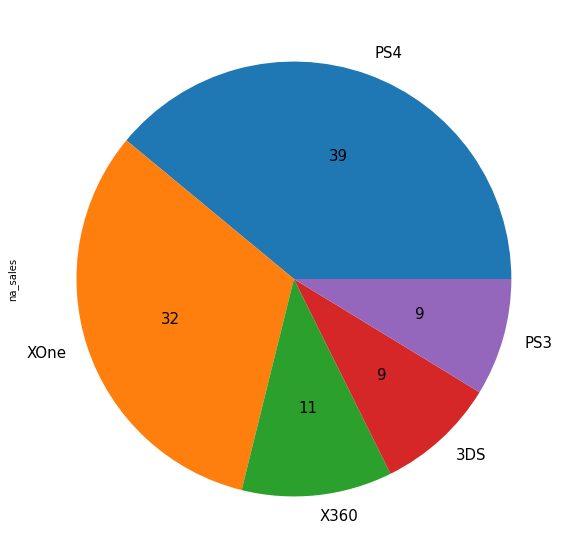

In [184]:
# определяем популярность платформ в долевом отношении
na_pplot.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15);

* **Смотрим на сумму продаж в Европе**.

In [130]:
#Смотрим на сумму продаж в Европе
eu_pplot = new_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_pplot

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

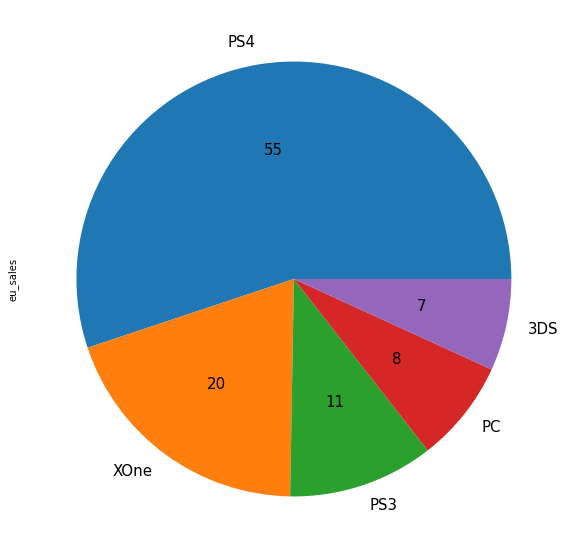

In [185]:
# определяем популярность платформ в долевом отношении
eu_pplot.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

* **Смотрим на сумму продаж в Японии**.

In [132]:
#Смотрим на сумму продаж в Японии
jp_pplot = new_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_pplot

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

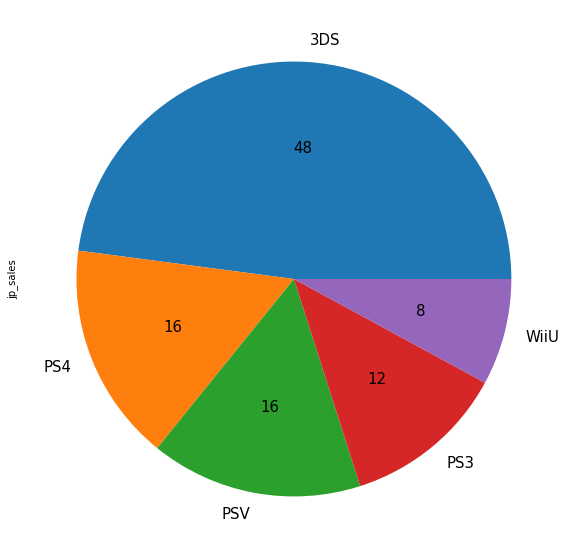

In [186]:
# определяем популярность платформ в долевом отношении
jp_pplot.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

In [174]:
# Сводим все данные продаж в одну таблицу (датафрейм)
new_data_pplot = pd.DataFrame(data=[na_pplot,eu_pplot, jp_pplot]).T
new_data_pplot

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,NaN
X360,28.30,NaN,NaN
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22
PC,NaN,17.97,NaN
PSV,NaN,NaN,14.54
WiiU,NaN,NaN,7.31


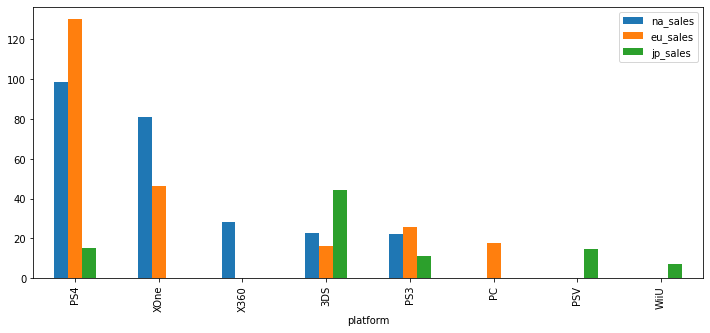

In [175]:
new_data_pplot.plot(kind='bar',figsize=(12,5)); # строим столбчатые диаграммы

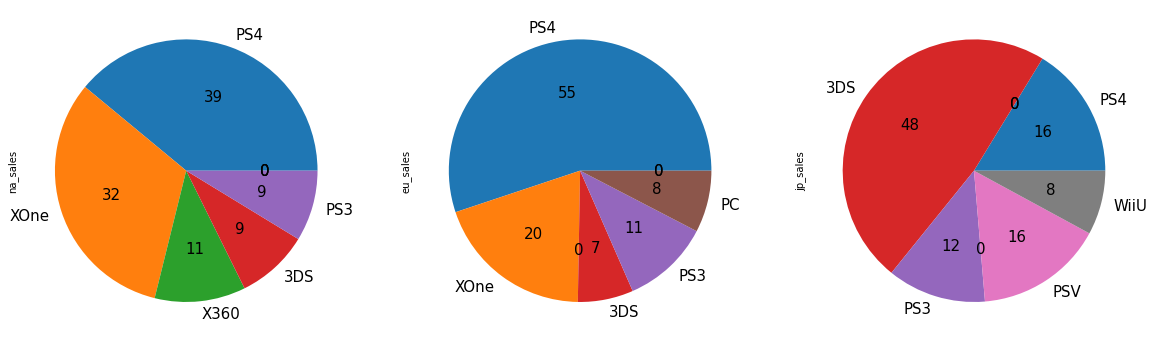

In [166]:
# определяем популярность платформ в долевом отношении
new_data_pplot.plot(subplots=True, kind='pie', figsize=(20,20),\
                    legend = False, autopct='%.0f', fontsize=15); 

* **Краткие выводы:**

Как видим, продажи в каждом из регионов отличаются друг от друга:

- В Северной Америке наибольшее количество продаж принесли: PS4, XOne, X360, 3DS, PS3 (39%, 32%, 11%, 9%, 9%)
- В Европе наибольшее количество продаж принесли: PS4, XOne, PS3, 3DS, PC (55%, 20%, 11%, 8%, 7%)
- В Японии наибольшее количество продаж принесли: 3DS, PS4, PSV, PS3, WiiU (48%, 16%, 16%, 12%, 8%)

Американские и Европейские пользователи по большей части имеют схожие вкусы и для игр предпочитают в основном платформы PS4 (PlayStation 4) и XOne (Xbox One).

Японские же пользователи отдают большее предпочтение переносным платформам, таким как 3DS (Nintendo 3DS), PSV (PlayStation Vita).

И, хоть наиболее популярным и является консоль PS4, мы также замечаем, что различие в предпочтениях между западными регионами (Северная Америка, Европа) и восточными регионами (Япония) присутствует!

Если рассматривать популярность в процентом соотношении, то можно сделать следующие выводы:

- В Северной Америке платформы PS4, PS3, XOne, X360 - занимают 82% всего рынка консолей. (в разрезе с 2014 года)
- В Европе платформы PS4, PS3, XOne, X360 - занимают 80% всего рынка консолей. (в разрезе с 2014 года)
- В Японии же наибольшая доля рынка консолей принадлежит переносным платформам 3DS, PSV - 64% (в разрезе с 2014 года)\
А консоли PS4, PS3, XOne, X360 -занимают всего около 28% оставшегося ранка.



### Определяем самые популярные жанры для пользователей.

Также, как и в предыдущем разделе, популярными жанрами будем считать те, которые прнесли наибольшую прибыль.

Для начала сгруппируем данные по жанрам и посчитаем количество продаж в каждом из регионов по отдельности.\
В расчет, как и ранее, мы будем брать данные с 2014 года.

* **Смотрим на сумму продаж в Северной Америке.**

In [167]:
#Смотрим на сумму продаж в Северной Америке
na_plot = new_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
na_plot

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

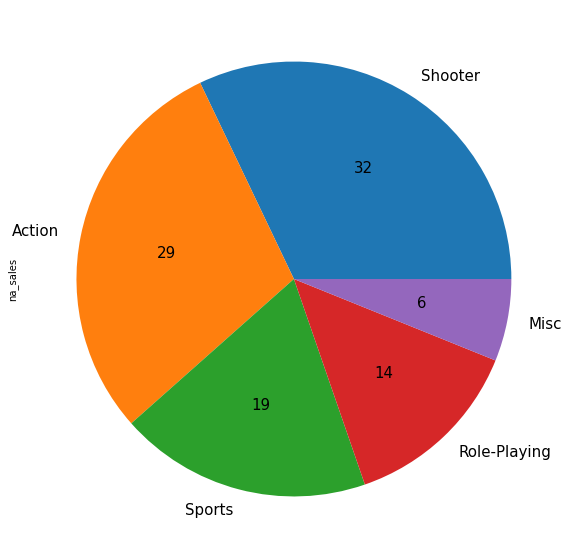

In [183]:
# определяем популярность платформ в долевом отношении
na_plot.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

* **Смотрим на сумму продаж в Европе.**

In [169]:
#Смотрим на сумму продаж в Европе
eu_plot = new_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_plot

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

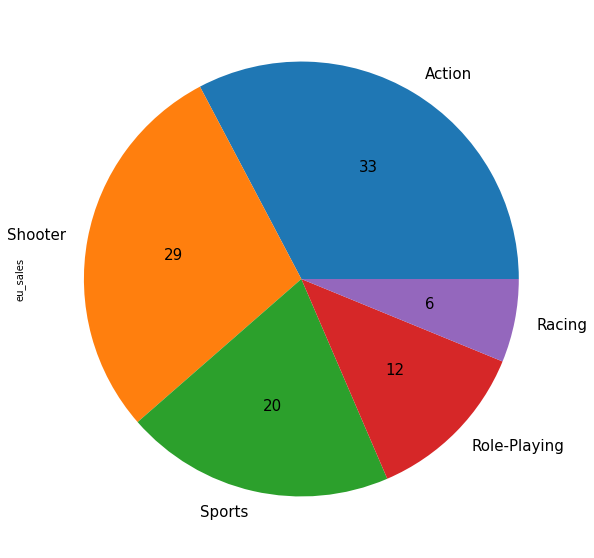

In [187]:
# определяем популярность платформ в долевом отношении
eu_plot.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

* **Смотрим на сумму продаж в Японии.**

In [171]:
#Смотрим на сумму продаж в Японии
jp_plot = new_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_plot

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

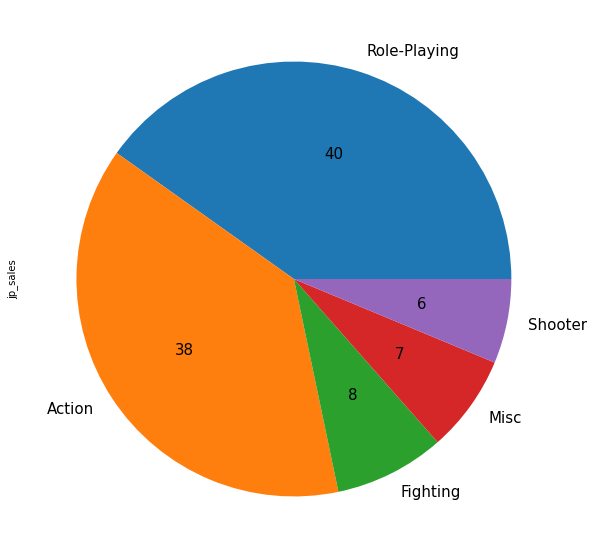

In [188]:
# определяем популярность платформ в долевом отношении
jp_plot.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

In [86]:
round(new_data['na_sales'].sum(), 2) #Смотрим на сумму продаж игр всех жанров в Северной Америке

284.06

In [87]:
round(new_data['eu_sales'].sum(), 2) #Смотрим на сумму продаж игр всех жанров в Европе

270.68

In [88]:
round(new_data['jp_sales'].sum(), 2) #Смотрим на сумму продаж игр всех жанров в Японии

93.09

In [177]:
# сводим все значения в одну таблицу (датафрейм)
new_data_plot = pd.DataFrame(data=[na_plot,eu_plot, jp_plot]).T
new_data_plot

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,NaN
Role-Playing,33.47,28.17,31.16
Misc,15.05,NaN,5.61
Racing,NaN,14.13,NaN
Fighting,NaN,NaN,6.37


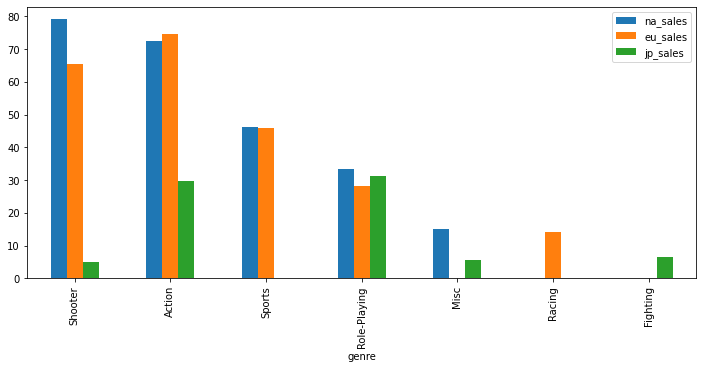

In [178]:
new_data_plot.plot(kind='bar',figsize=(12,5)); # строим столбчатые диаграммы

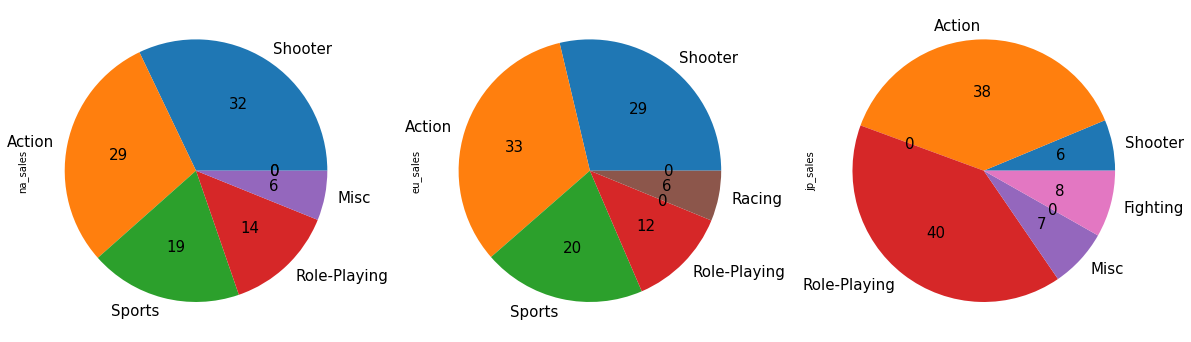

In [180]:
# определяем популярность платформ в долевом отношении
new_data_plot.plot(subplots=True, kind='pie', figsize=(20,20),\
                    legend = False, autopct='%.0f', fontsize=15); 

* **Краткие выводы:**

Как видим, продажи в каждом из регионов отличаются друг от друга:

- В Северной Америке наибольшее количество продаж принесли игры жанра: Shooter, Action, Sports, Role-Playing, Misc (32%, 29%, 19%, 14%, 6%)
- В Европе наибольшее количество продаж принесли жанры: Action, Shooter, Sports, Role-Playing, Racing (29%, 33%, 20, 12%, 6%)
- В Японии наибольшее количество продаж принесли: Role-Playing, Action, Fighting, Misc, Shooter (40%, 38%, 8%, 7%, 6%)

Американские и Европейские пользователи имеют схожие вкусы и из игр предпочитают в основном следующие жанры Shooter, Action, Sports.

Японские же пользователи отдают большее предпочтение иным жанрам игр, таким как Role-Playing, Action, Fighting.

И, хоть в среднем наиболее популярным для всех регионов и является жанр Action, мы также замечаем, что различие в предпочтениях между западными регионами (Америка, Европа) и Восточными регионами (Япония) присутствует!

- Самые непопулярные игры во всех трёх странах имеют жанр - Puzzle

Если рассматривать популярность в процентом соотношении, то можно сделать следующие выводы:

- В Северной Америке игры жанра Shooter, Action, Sports - занимают 70% всего рынка. (в разрезе с 2014 года)
- В Европе игры жанра Shooter, Action, Sports - занимают 69% всего рынка.(в разрезе с 2014 года)
- В Японии же наиболее популярными жанрами в игре являются Role-Playing, Action, Fighting - они занимают 69% всего рынка.(в разрезе с 2014 года)


- Если нас заинтересует вопрос:\
"Пользователи из каких стран принесли наибольшую прибыль играя в игры всех жанров?"\
Ответом на данный вопрос будут следующие значения:
- Пользователи из Северной Америки принесли - 284,06 млн.
- Пользователи из Европы принесли - 270,68 млн.
- Пользователи из Японии принесли - 93.09 млн.

### Определяем, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Также, как и в предыдущих шагах, сгруппируем данные, теперь уже по рейтингу, и посмотрим на суммарные продажи в каждом из регионов.

* **Смотрим на сумму продаж игр (различных рейтингов) в Северной Америке.**

In [92]:
# смотрим на сумму продаж в Северной Америке
na_rat = new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rat

rating
M               96.42
рейтинга нет    64.72
E               50.74
T               38.95
E10+            33.23
Name: na_sales, dtype: float64

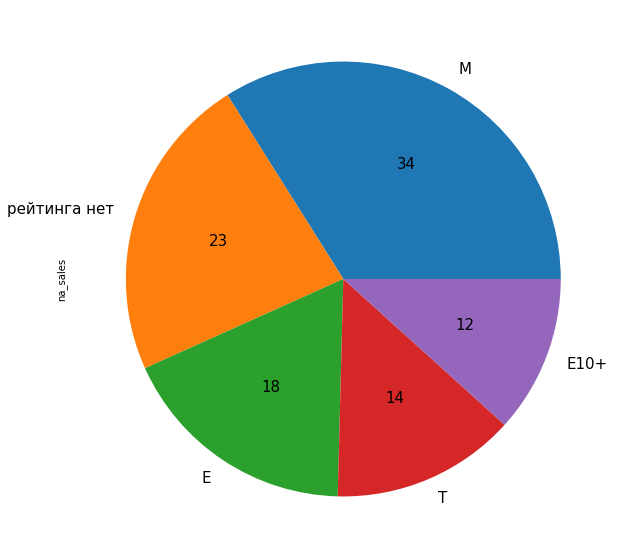

In [189]:
# определяем популярность платформ в долевом отношении
na_rat.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

* **Смотрим на сумму продаж игр (различных рейтингов) в Европе.**

In [94]:
# смотрим на сумму продаж в Европе
eu_rat = new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rat

rating
M               93.44
рейтинга нет    58.95
E               58.06
T               34.07
E10+            26.16
Name: eu_sales, dtype: float64

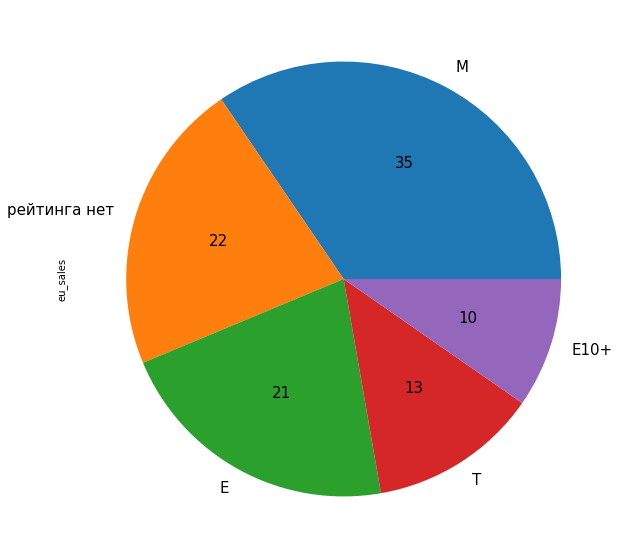

In [190]:
# определяем популярность платформ в долевом отношении
eu_rat.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

* **Смотрим на сумму продаж игр (различных рейтингов) в Японии.**

In [96]:
# смотрим на сумму продаж в Японии
jp_rat = new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rat

rating
рейтинга нет    56.90
T               14.78
E                8.94
M                8.01
E10+             4.46
Name: jp_sales, dtype: float64

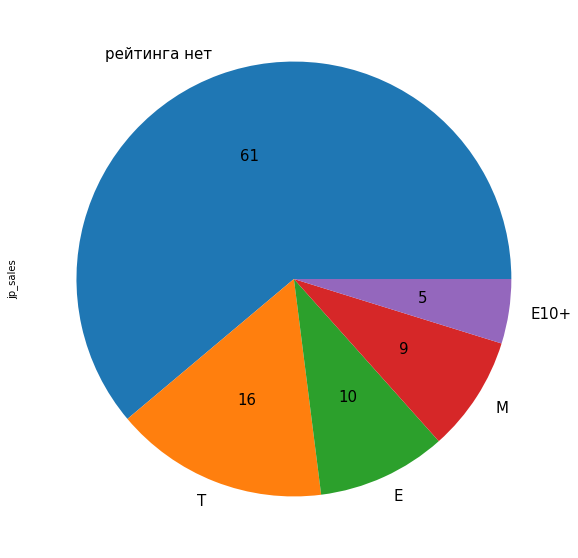

In [191]:
# определяем популярность платформ в долевом отношении
jp_rat.plot(kind='pie', figsize=(15,10), autopct='%.0f', fontsize=15); 

Сводим все данные в одну таблицу, чтобы посмотреть на их соотношение.

In [98]:
# сводим все значения в одну таблицу (датафрейм)
new_data_rplot = pd.DataFrame(data=[na_rat,eu_rat, jp_rat]).T
new_data_rplot

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
рейтинга нет,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


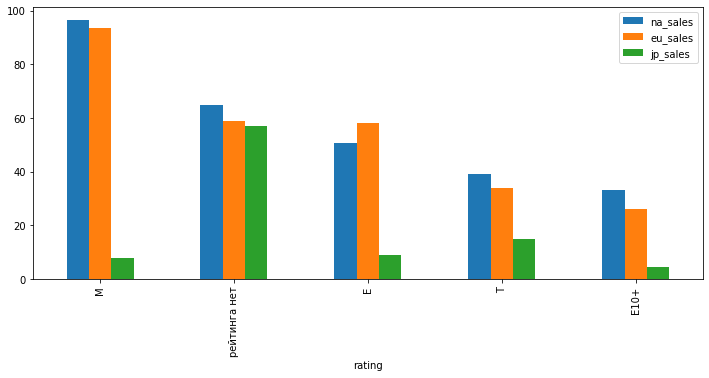

In [99]:
new_data_rplot.plot(kind='bar',figsize=(12,5)); # строим столбчатые диаграммы

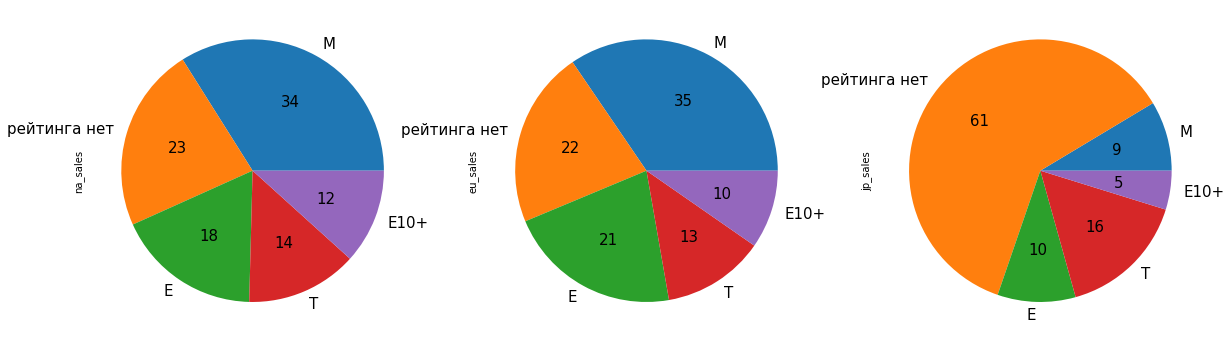

In [195]:
# определяем популярность платформ в долевом отношении
new_data_rplot.plot(subplots=True, kind='pie', figsize=(20,20),\
                    legend = False, autopct='%.0f', fontsize=15);

* **Краткие выводы:**

- Согласно полученным данным невозможно сделать однозначные выводы:

1. С одной стороны - мы замечаем, что наиболее популярными рейтингами в Америке и Европе являются игры, рейтинг которых - 'М' (для взрослых от 17 лет).
2. С другой стороны на втором месте расположились игры, у которых вовсе отсутствует рейтинг. (22%-23%)\
(Это те самые данные, которые отсутсвуют в нашей таблице. Все пропуски мы сгруппировали в одну ячейку).

3. В Японии ситуация ещё хуже, чем в Америке и Европе. 
4. Здесь у наибольшей доли игр отсутствует рейтинг. (61% от общего числа)\
(С чем связаны пропуски в рейтингах - сложно сказать).

5. Учитывая всё выше описанное, делаем вывод, что, к сожалению, имеющихся у нас данных не достаточно для того, чтобы ответить на поставленный вопрос, а именно:
-Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Слишком много данных отсутствует.

## Шаг 5. Проверка гипотез.

### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Никакие экспериментально полученные данные не подтвердят гипотезу.\
Это фундаментальное ограничение.\
При условии, что гипотеза верна, данные могут лишь не противоречить ей или, наоборот, показывать очень маловероятные результаты.

Проверка гипотез начинается с формулировки нулевой гипотезы.

**Нулевая гипотеза:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Исходя из H₀ формулируется также альтернативная гипотеза H₁.\
Это утверждение будет приниматься верным, если отбрасывается H₀.

**Альтернативная гипотеза:**
- средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые.

В нашем случае мы рассматриваем гипотезу о равенстве средних двух генеральных совокупностей данных.

Для удобства сравнения, сохраним данные совокупные значения в отдельные переменные.

**Xbox_rating** - будет включать в себя пользовательские рейтинги платформы Xbox One.\
**PC_rating** - будет включать в себя пользовательские рейтинги платформы PC.

In [101]:
Xbox_rating = new_data[new_data['platform'] ==
                       'XOne'].user_score.dropna().values
Xbox_rating # выводим на экран пользовательские рейтинги по платформе XOne

array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 6.4, 5.5, 3.1, 6.1,
       6.2, 8.2, 5.4, 6.9, 7.9, 6.3, 7.5, 5.8, 6.4, 6.6, 8.2, 7.3, 8. ,
       8. , 6.2, 6.9, 9.2, 6.1, 7.8, 8.4, 5.9, 5.1, 5.2, 7.7, 7.4, 5.6,
       6.2, 6.9, 7. , 6.4, 7.7, 7.3, 7.4, 7.8, 7.3, 6.7, 5.9, 5.1, 4.6,
       5.1, 5.7, 8. , 5.7, 6.8, 5.1, 7.5, 6.9, 7.8, 8.1, 6. , 6.4, 6.3,
       7.8, 7.1, 6. , 6.9, 3.2, 8.6, 7.7, 5.1, 6.6, 7.9, 6.1, 7.2, 8.5,
       7. , 5.4, 4.3, 6.8, 5.5, 5.8, 5.3, 7.1, 5.5, 4. , 8.3, 6.8, 6.7,
       6.8, 7.3, 7. , 8.3, 7. , 7.2, 4.4, 7. , 8.3, 7.5, 8. , 7.2, 6.6,
       7.3, 4.1, 7.9, 8.7, 5.7, 8. , 2.1, 8.2, 5.6, 7.2, 6.2, 5.3, 7.5,
       6. , 3.1, 7.6, 8.5, 6.8, 6.3, 5.8, 7.7, 6.9, 8.4, 5.2, 4.9, 7.1,
       7.1, 6.1, 8.1, 6.3, 6. , 8.9, 7.7, 1.6, 8. , 5.4, 8.1, 4.3, 7.4,
       4.3, 7.1, 5.8, 4.2, 6.6, 7.3, 7.2, 7.1, 6.7, 8.8, 7.9, 8.1, 3.1,
       7.5, 6.3, 8.2, 7.1, 6.8, 6. , 8.2, 6.6, 6.7])

In [102]:
PC_rating = new_data[new_data['platform'] ==
                     'PC'].user_score.dropna().values
PC_rating # выводим на экран пользовательские рейтинги по платформе PC

array([3.9, 5.4, 7.9, 5.7, 5.9, 9.3, 8. , 6.7, 6.2, 3. , 6.8, 8.3, 5.9,
       6. , 8.2, 4.7, 5.8, 4.5, 7.6, 5.5, 8. , 6.9, 7.5, 6.2, 4.2, 5.9,
       5.9, 7.3, 7.3, 7.1, 6.9, 7.3, 5.9, 4.4, 7.9, 3.2, 8.6, 4.3, 7.1,
       4.8, 6.4, 7.4, 8.4, 5.3, 8.9, 3.8, 3. , 7.3, 2.5, 7.1, 7.9, 6. ,
       7. , 4.2, 7.3, 5.7, 5.7, 4.8, 4.3, 7.6, 5.7, 6.9, 8. , 7.5, 7.7,
       8.6, 4.4, 5.8, 6.8, 6.8, 2.9, 8.2, 6.9, 7.4, 3.6, 5.1, 5.4, 7.5,
       8.6, 4.3, 8. , 7.6, 7.1, 4. , 7.7, 7. , 3.5, 4.8, 6.1, 6.3, 8.7,
       6.8, 7.6, 6.9, 4.8, 6.1, 6.2, 7.7, 7.8, 1.4, 3.7, 2.4, 8.5, 5.4,
       7.4, 8.3, 8.7, 5.3, 4.3, 6.2, 6.3, 7.7, 6.8, 7.3, 7.1, 7.1, 7.1,
       8.3, 6.8, 7.9, 1.4, 7.6])

In [201]:
Xbox_rating.mean() # среднее значение рейтинга пользователей на платформе Xbox

6.594545454545456

In [198]:
PC_rating.median() # среднее значение рейтинга пользователей на платформе PC

6.298360655737705

Зададим критический уровень статистической значимости alpha на уровне 1% (0.01).

И проверим нашу гипотезу о равенстве средних двух независимых совокупностей с помощью метода:\
scipy.stats.ttest_ind (array1, array2, equal_var)\
t-тест определяет разницу между средними арифметическими двух выборок.\
equal_var - по умолчанию примет параметр True, так что его в наших расчетах указывать не будем.

In [199]:
alpha = 0.01 # задаем критический уровень статистической значимости (1%)

# проверяем гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(Xbox_rating, PC_rating) 

# выводим на экран получившеся p-значение)
print('p-значение:', results.pvalue) 

# сравниваем получившееся p-значение 
# с заданным уровнем статистической значимости

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть нулевую гипотезу.**
    
Значит:\
В нашем срезе (с 2014 года) мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
    **Присутствует вероятность, что средние пользовательские рейтинги на данных платформах могут быть одинаковыми.**

* **Краткие выводы:**

1. В данном разделе нам требовалось проверить гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые.
2. Мы составили нулевую и альтернативные гипотезы:
**нулевая гипотеза:**
* средние пользовательские рейтинги платформ XOne и PC одинаковые.

**альтернативная гипотеза:**
* средние пользовательские рейтинги платформ XOne и PC не одинаковые.
3. Проверяли гипотезы мы с помощью так называемого **t-теста**.\
t-тест определяет разницу между средними арифметическими двух выборок.
- Метод - scipy.stats.ttest_ind (array1, array2)
4. Проверка гипотез дала нам следующий результат:
- **Мы не смогли отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

5. В нашем случае, в срезе данных (с 2014 года) мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Присутствует вероятность, что средние пользовательские рейтинги на данных платформах могут быть одинаковыми.

### Гипотеза №2. Средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) разные.

Также, как и в предыдущем разделе рассмотрение начнем с фундаментальной теории:

Никакие экспериментально полученные данные не подтвердят гипотезу.\
Это фундаментальное ограничение.\
При условии, что гипотеза верна, данные могут лишь не противоречить ей или, наоборот, показывать очень маловероятные результаты.

Проверка гипотез начинается с формулировки нулевой гипотезы.

**Нулевая гипотеза:**
- Средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) одинаковые


Исходя из нулевой гипотезы (H₀) формулируется также альтернативная гипотеза (H₁.)\
Это утверждение будет приниматься верным, если отбрасывается (H₀).

**Альтернативная гипотеза:**
- Средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) не одинаковые.

Также, как и раньше, сохраняем наши выборки данных в отдельные переменные.

**Action_rating** - будет включать в себя пользовательские рейтинги жанра Action.\
**Sports_rating** - будет включать в себя пользовательские рейтинги жанра Sports.

In [104]:
Action_rating = new_data[new_data['genre'] ==
                       'Action'].user_score.dropna().values

Sports_rating = new_data[new_data['genre'] ==
                     'Sports'].user_score.dropna().values

In [207]:
Action_rating.mean() # средние пользовательские рейтинги жанра Action

6.760606060606061

In [208]:
Sports_rating.mean() # средние пользовательские рейтинги жанра Sports

5.2251968503937

Зададим критический уровень статистической значимости alpha на уровне 1% (0.01).

И проверим нашу гипотезу о равенстве средних двух независимых совокупностей с помощью метода:\
scipy.stats.ttest_ind (array1, array2, equal_var)\
t-тест определяет разницу между средними арифметическими двух выборок.\
equal_var - по умолчанию примет параметр True, так что его в наших расчетах указывать не будем.

In [209]:
alpha = 0.01 # задаем критический уровень статистической значимости (1%)

# проверяем гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(Action_rating, Sports_rating) 

# выводим на экран получившеся p-значение)
print('p-значение:', results.pvalue) 

# сравниваем получившееся p-значение 
# с заданным уровнем статистической значимости

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу.**

Значит:\
В нашем срезе (с 2014 года) мы отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.\
    **Присутствует вероятность, что средние пользовательские рейтинги данных жанров могут быть не одинаковыми.**

* **Краткие выводы:**

1. В данном разделе нам требовалось проверить гипотезу о том, что средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) разные
2. Мы составили нулевую и альтернативные гипотезы:
**нулевая гипотеза:**
* средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) одинаковые.

**альтернативная гипотеза:**
* средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) не одинаковые

3. Проверяли гипотезы мы с помощью так называемого **t-теста**.\
t-тест определяет разницу между средними арифметическими двух выборок.
- Метод - scipy.stats.ttest_ind (array1, array2)
4. Проверка гипотез дала нам следующий результат:
- **Мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги Action и Sports равны**.


5. В нашем случае нулевая гипотеза была отвергнута, а значит, **в срезе данных с 2014 года** - средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) скорее всего не одинаковые (**Разные!!!**).\
(т.е. в рассматриваемой нами выборке мы **не можем подтвердить, что рейтинги одинаковые**).

## Общий вывод

Предполагается, что мы по прежнему работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

Нами было проведено исследование, целью которого являлось следующее:

* Необходимо выявить определяющие успешность игры закономерности.

В ходе исследования нами были предприняты следующие шаги:

1. Изучение общей информации.
2. Подготовка данных. (обработка пропусков, замена типов данных и пр.)
3. Проведение исследовательского анализа данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.

### Выводы по Шагу 2:
    
Итак, в Шаге 2 мы подготавливали данные к дальнейшему исследовательскому анализу.

Нами были совершены следующие действия:

- Мы заменили названия столбцов (привели их к нижнему регистру).
- Преобразовали данные в нужные типы\
(заменили тип данных в столбцах 'user_score' и 'year_of_release')
- Заменили пропущенные значения на нулевые в столбце 'year_of_release'\
(общее количество пропущенных значений было меньше 1%).
- Определили вероятную аббревиатуру значения 'tbd' - (**не определенный**), и приняли решение удалить данные значения из столбца (приравнять **не определенные** значения к отсутствию значений в столбце).
- Создали новый столбец 'total_sales' и записали туда суммарное количество продаж игры во всех регионах.

### Выводы по Шагу 3:

Итак, в Шаге 3 мы проводили исследовательский анализ.

####  Мы определили какое кол-во игр выпускалось в разные периоды времени.
Из полученных данных мы сделали следующие наблюдения:
- Количество выпускаемых игр росло вплоть до 2008 года.
- Максимальное количество выпущенных игр было в 2008 году - 1427 игр.
- После кризиса 2008-2009 годов - количество выпускаемых игр начало уменьшаться. 
(Возможно это также как-то связано с тем, что игры стали более сложными и многоуровневыми и на их создание и поддержание стало уходить намного больше времени).
- наибольшая доля выпущенных игр приходилась на период с 2002 по 2012 годы.
(11405 игр из 16750 - ~68% всех игр).
- количество игр, выпущенных до 1994 равно 783 (что составляет менее 5% от общей выборки выпущенных игр).
- конечно, любые данные являются важными!!! однако если рассматривать общую совокупность данных, то как и было указано ранее - кол-во игр выпущенных до 1994 года не играет большой в общем количестве выпущенных игр (менее 5%).
- наиболее популярными платформами, выпувшими наибольшее количество игр - являлись следующие платформы: 
- PS2 (PlayStation 2)
- DS (Nintendo DS)
- PS3 (Playstation 3).

#### Определяли как менялись продажи по платформам.

- Нами было просмотрено, как менялись продажи по платформам с течением времени.
- Мы обнаружили, что наибольшее количество продаж игр приходилось на следующие платформы: PS2, X360, PS3, Wii, DS.
- Суммарный пик продаж игр на всех платформах был в период с 2005 по 2012 годы.
- Было обнаружено, что в среднем игры на каждой из платформ выпускаются (продаются) от 10 до 12 лет.
- Грубо говоря - от 10 до 12 лет - это средний срок жизни платформы, по истечению которого, старые платформы исчезнают, а вместо них появляются новые.

#### Определяли актуального период для построения прогноза продаж на 2017 год.

- Изначально планировалось рассматривать несколько временных периодов, однако было обнаружено, что в этом практически не было смысла.
- Конечным нашим вариантом, стало решение что для более точного прогноза продаж, мы будем использовать только последние несколько лет.
- Таким образом, мы выбрали период с 2014 года и далее рассматривали данные только за этот период.

#### Определяли какие платформы лидируют по продажам.

Рассмотрев продажи за последние 3 года мы сделали следующие наблюдения:

1. Продажи почти по всем платформам за последние 3 года в основном уменьшаются (исключением является платформа 3DS (Nintendo 3DS).
2. Наибольшее кол-во игр было выпущено (после 2013 года) следующими платформами: 
- PS4 - (PlayStation4)
- PSV - (PlayStation Vita)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)
3. Наиболее прибыльными платформами (после 2013 года) являлись следующие 3 платформы:
- PS4 - (PlayStation4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)

Наименьшая динамика продаж у платформ PSP (продажи прекратились окончательно), Wii (продажи стремятся к нулю).

#### Строили диаграммы размаха ("ящик с усами") по глобальным продажам игр в разбивке по платформам.

Мы построили и рассмотрели диаграммы размаха ('ящик с усами') по глобальным продажам игр в разбивке по платформам.

1. Согласно полученным диаграммам делаем вывод, что наиболее прибыльными платформами (после 2013 года) являлись следующие 3 платформы:
- PS4 - (PlayStation4)
- XOne - (Xbox One)
- 3DS - (Nintendo 3DS)

Наибольшие медианные значения продаж принадлежат платформам XOne, WiiU, PS4.\
Наименьшие медианные значения продаж принадлежат следующим платформам: PC, PSV, PSP

т.е. другими словами, не смотря на абсолютное количество проданных игр на платформе 3DS, медианное значение продаж на этой платформе меньше почти в 2 раза, чем количество продаж на платформе WiiU.

#### Смотрели как влияют на продажи отзывы пользователей и критиков.

1. Нами были построены диаграммы рассеивания и рассмотрены/рассчитаны отношения между продажами и отзывами критиков/пользователей.
2. И диаграммы рассеивания и рассчитаная корреляция дали нам примерно похожие результаты.
3. Сложно сказать, существует ли прямая зависимость количества продаж от оценок критиков.\
(корреляция вроде как есть, средняя, положительная (0.31-0.43).\
Однако данная корреляция выражена не четко (не очень сильно (корреляция меньше 0.5)), и, как следствие, мы не можем однозначно утверждать, что зависимость между оценкой критиков и продажами есть, но в то же время, мы и не можем полностью опровергуть эту теорию.\
    **Можно сказать, что согласно полученным данным, невозможно сделать однозначные выводы о наличии или отсутствии зависимости.**

4. В то же время, согласно полученным значениям по оценкам пользователей, видим, что зависимость между отзывами пользователей  продажами игр ещё меньше, чем зависимость от отзывов критиков. Согласно нашим данным, влияния замечено не было.\
(Корреляция почти нулевая)\
И хоть мы и не можем, также однозначно заявлять, что оценки пользователей никак не влияют на количество продаж, но, по нашим наблюдениям, отзывы пользователей если и влияют на количество продаж, то данное влияние нами обнаружено не было.
    
5. Не забываем, что в данных с рейтингами пользователей/критиков у нас отсутствует огромное количество значений, а значит любые выводы, которые мы можем сделать, мы делаем с огромной оговоркой (с погрешностью почти в 50%).
    
    Как итог, повторяюсь, **невозможно сделать однозначные выводы о наличии или отсутствии зависимости между продажами и оценками.**

#### Смотрели на общее распределение игр по жанрам.

- Обнаружили что в среднем, наибольшую прибыль приносят игры жанра **Shooter**.
- На втором месте по прибыльности в среднем игры жанра **Sports.**
- Третью и четвертые строчки занимают Платформенные игры (platform) и файтинги (fighting).


- Наименее популярными жанрами в среднем за последние несколько лет были игры следующего жанра:
- Adventure (приключенческие)
- Puzzle (паззлы)
- Strategy (стратегии)


Интересное наблюдение:\
Несмотря на то, что игры жанра **Action** выходили чаще всего и они принесли наибольшую прибыль компаниям, в среднем игры данного жанра приносят не так уж и много прибыли.\
Видимо игр данного жанра выходит слишком много и конкурировать в этом жанре нет особого смысла.

В то же время игры жанра **Shooter** выходят не так часто, но имеют наибольшие средние прибыли.\
Видимо данный жанр больше всего нравился пользователям в течении последних трех лет.

### Выводы по Шагу 4:

####  Определяли самые популярные платформы для пользователей.

Как видим, продажи в каждом из регионов отличаются друг от друга:

- В Северной Америке наибольшее количество продаж принесли: PS4, XOne, X360. (35%, 29%, 10%)
- В Европе наибольшее количество продаж принесли: PS4, XOne, PS3 (48%, 17%, 9%)
- В Японии наибольшее количество продаж принесли: 3DS, PS4, PSV (48%, 16%, 16%)

Американские и Европейские пользователи по большей части имеют схожие вкусы и для игр предпочитают в основном платформы PS4 (PlayStation 4) и XOne (Xbox One).

Японские же пользователи отдают большее предпочтение переносным платформам, таким как 3DS (Nintendo 3DS), PSV (PlayStation Vita).

И, хоть наиболее популярным и является консоль PS4, мы также замечаем, что различие в предпочтениях между западными регионами (Северная Америка, Европа) и восточными регионами (Япония) присутствует!

Если рассматривать популярность в процентом соотношении, то можно сделать следующие выводы:

- В Северной Америке платформы PS4, PS3, XOne, X360 - занимают 82% всего рынка консолей.
- В Европе платформы PS4, PS3, XOne, X360 - занимают 80% всего рынка консолей.
- В Японии же наибольшая доля рынка консолей принадлежит переносным платформам 3DS, PSV - 64%\
А консоли PS4, PS3, XOne, X360 -занимают всего около 28% оставшегося ранка.

#### Определяли самые популярные жанры для пользователей.

Как видим, продажи в каждом из регионов отличаются друг от друга:

- В Северной Америке наибольшее количество продаж принесли игры жанра: Shooter, Action, Sports. (28%, 26%, 16%)
- В Европе наибольшее количество продаж принесли жанры: Action, Shooter, Sports. (28%, 24%, 17%)
- В Японии наибольшее количество продаж принесли: Role-Playing, Action, Fighting. (33%, 32%, 7%)

Американские и Европейские пользователи имеют схожие вкусы и из игр предпочитают в основном следующие жанры Shooter, Action, Sports.

Японские же пользователи отдают большее предпочтение иным жанрам игр, таким как Role-Playing, Action, Fighting.

И, хоть в среднем наиболее популярным для всех регионов и является жанр Action, мы также замечаем, что различие в предпочтениях между западными регионами (Америка, Европа) и Восточными регионами (Япония) присутствует!

- Самые непопулярные игры во всех трёх странах имеют жанр - Puzzle

Если рассматривать популярность в процентом соотношении, то можно сделать следующие выводы:

- В Северной Америке игры жанра Shooter, Action, Sports - занимают 70% всего рынка.
- В Европе игры жанра Shooter, Action, Sports - занимают 69% всего рынка.
- В Японии же наиболее популярными жанрами в игре являются Role-Playing, Action, Fighting - они занимают 69% всего рынка.


#### Определяли, влияет ли рейтинг ESRB на продажи в отдельном регионе.

- Согласно полученным данным невозможно сделать однозначные выводы:

1. С одной стороны - мы замечаем, что наиболее популярными рейтингами в Америке и Европе являются игры, рейтинг которых - 'М' (для взрослых от 17 лет).
2. С другой стороны на втором месте расположились игры, у которых вовсе отсутствует рейтинг. (22%-23%)\
(Это те самые данные, которые отсутствуют в нашей таблице. Все пропуски мы сгруппировали в одну ячейку).

3. В Японии ситуация ещё хуже, чем в Америке и Европе. 
4. Здесь у наибольшей доли игр отсутствует ESRB рейтинг. (61% от общего числа)\
(С чем связаны пропуски в рейтингах - сложно сказать, возможно это как-то связано с культурными особенностями стран).

5. Учитывая всё выше описанное, делаем вывод, что, к сожалению, имеющихся у нас данных не достаточно для того, чтобы ответить на поставленный вопрос, а именно:
-Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Мы не знаем. Слишком много данных отсутствует. Вследствие чего невозможно сделать однозначеные выводы.

### Выводу по Шагу 5:

#### Мы строили гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1. В данном разделе нам требовалось проверить гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые.
2. Мы составили нулевую и альтернативные гипотезы:
**нулевая гипотеза:**
* средние пользовательские рейтинги платформ XOne и PC одинаковые.

**альтернативная гипотеза:**
* средние пользовательские рейтинги платформ XOne и PC не одинаковые.
3. Проверяли гипотезы мы с помощью так называемого **t-теста**.\
t-тест определяет разницу между средними арифметическими двух выборок.
- Метод - scipy.stats.ttest_ind (array1, array2)
4. Проверка гипотез дала нам следующий результат:
- **Мы не смогли отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

5. В нашем случае, в срезе данных (с 2014 года) мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Присутствует вероятность, что средние пользовательские рейтинги на данных платформах могут быть одинаковыми.


6. Независимо от того отвергли мы гипотезу или не смогли её отвергнуть, не забываем, что данные гипотезы строились только на имеющихся у нас данных, а как было указано ранее, в столбцах с оценками пользователей было очень много пропущенных данных, т.е. любые гипотезы могут быть нами отвергнуты/не отвергнуты только с большой оговоркой (почти в 50%).

#### Мы также строили гипотезу о том, что средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) разные.

1. В данном разделе нам требовалось проверить гипотезу о том, что средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) разные
2. Мы составили нулевую и альтернативные гипотезы:
**нулевая гипотеза:**
* средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) одинаковые.

**альтернативная гипотеза:**
* средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) не одинаковые

3. Проверяли гипотезы мы с помощью так называемого **t-теста**.\
t-тест определяет разницу между средними арифметическими двух выборок.
- Метод - scipy.stats.ttest_ind (array1, array2)
4. Проверка гипотез дала нам следующий результат:
- **Мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги Action и Sports равны**.


5. В нашем случае нулевая гипотеза была отвергнута, а значит, **в срезе данных с 2014 года** - средние пользовательские рейтинги жанров Action (экшн) и Sports (спорт) скорее всего не одинаковые (**Разные!!!**).\
(т.е. в рассматриваемой нами выборке мы **не можем подтвердить, что рейтинги одинаковые**).


6. Независимо от того отвергли мы гипотезу или не смогли её отвергнуть, не забываем, что данные гипотезы строились только на имеющихся у нас данных, а как было указано ранее, в столбцах с оценками пользователей было очень много пропущенных данных, т.е. любые гипотезы могут быть нами отвергнуты/не отвергнуты только с большой оговоркой (почти в 50%).

#### Итоговый вывод:

В ходе исследования мы определили большое количество факторов, влияющих на успешность игры.

Итак, ещё раз вкратце опишем все обнаруженные нами факторы, влияющие на успешность игры:

1. Время продажи игр.
2. Платформы, на которых продаются игры
3. Жанры игр.
4. Регионы продаж игр.

При этом:\
Полученная нами данные не дают возможности однозначно подтвердить или опровергуть, что отзывы критиков/пользователей влияют на количество продаж.\
Также, отсутствие большого массива данных не позволяет сделать какие-либо выводы, касательно того, влияет ли ESRB рейтинг на продажи игр.


Для наглядности, мы попробуем описать примерные портреты продаж по регионам:


- В Северной Америке, наиболее популярными играми (которые принесли наибольшие прибыли за последние годы) являлись:\
Игры, вышедшие на платформе PS4, жанра Shooter


- В Европе, наиболее популярными играми (которые принесли наибольшие прибыли за последние годы) являлись:\
Игры, вышедшие на платформе PS4, жанра Action

- В Японии, наиболее популярными играми (которые принесли наибольшие прибыли за последние годы) являлись:\
Игры, вышедшие на платформе 3DS, жанра Role-Playing


В завершении, хотелось бы ещё раз отметить, что менталитеты пользователей из Северной Америки и Европы очень похожи (в рамках выбора игр).\
В то же время, пользователи из Японии имеют немного другие вкусы в выборе игр, по отношенюю с пользователями из Северной Америки и Европы.


Если бы было необходимо спланировать рекламные компании на 2017 год, мы бы могли предложить ориентироваться на описанные нами портреты примерных интересов в каждом отдельном регионе.